In [4]:
!pip install seaborn matplotlib numpy pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 11.2 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy

# description
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary. https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study


In [10]:
dfm = pd.read_csv("Maths.csv")
dfp = pd.read_csv("Portuguese.csv")

In [11]:
print('math shape', dfm.shape)
print('portuguese shape', dfp.shape)

math shape (395, 33)
portuguese shape (649, 33)


In [12]:
dfm.head()
dfp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [13]:
dfm.columns.to_list()
print('math')
dfm.info()
print('\nportuguese')
dfp.info()

math
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  highe

##### dados faltantes

In [15]:
dfm.isna().sum() #math 0 na
dfp.isna().sum() #portuguese 0 na

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

##### balanceamento dos dados

In [16]:
cm = dfm.columns.to_list()
cp = dfp.columns.to_list()

In [18]:
for x in cm:
    print(f'Math column: {x}\n{dfm[x].value_counts()}\n')
    
    if dfm[x].dtypes == "int64":
        valores =  [dfm[x]]
        media = np.average(valores)
        variancia = np.var(valores)
        desvio = np.std(valores)
        mediana = np.median(valores)

        print(f'{x}\nmedia: {media} \nvariancia: {variancia} \ndesvio: {desvio} \nmediana: {mediana} \n')
    else:
        pass
    print(f'{15*"====="}')

Math column: school
GP    349
MS     46
Name: school, dtype: int64

Math column: sex
F    208
M    187
Name: sex, dtype: int64

Math column: age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

age
media: 16.696202531645568 
variancia: 1.6241627944239705 
desvio: 1.2744264570480206 
mediana: 17.0 

Math column: address
U    307
R     88
Name: address, dtype: int64

Math column: famsize
GT3    281
LE3    114
Name: famsize, dtype: int64

Math column: Pstatus
T    354
A     41
Name: Pstatus, dtype: int64

Math column: Medu
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

Medu
media: 2.749367088607595 
variancia: 1.1954109918282327 
desvio: 1.0933485225801665 
mediana: 3.0 

Math column: Fedu
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

Fedu
media: 2.5215189873417723 
variancia: 1.1811825028040381 
desvio: 1.0868222038604283 
mediana: 2.0 

Math column: Mjob
other       141
services    1

In [20]:
for x in cp:
    print(f'Portuguese column: {x}\n{dfp[x].value_counts()}\n')
    
    if dfp[x].dtypes == "int64":
        valores =  [dfp[x]]
        media = np.average(valores)
        variancia = np.var(valores)
        desvio = np.std(valores)
        mediana = np.median(valores)

        print(f'{x}\nmedia: {media} \nvariancia: {variancia} \ndesvio: {desvio} \nmediana: {mediana} \n')
    else:
        pass
    print(f'{15*"====="}')
#para melhor visualizacao criarei graficos de barra


Portuguese column: school
GP    423
MS    226
Name: school, dtype: int64

Portuguese column: sex
F    383
M    266
Name: sex, dtype: int64

Portuguese column: age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

age
media: 16.7442218798151 
variancia: 1.4815729307385312 
desvio: 1.2171988049363716 
mediana: 17.0 

Portuguese column: address
U    452
R    197
Name: address, dtype: int64

Portuguese column: famsize
GT3    457
LE3    192
Name: famsize, dtype: int64

Portuguese column: Pstatus
T    569
A     80
Name: Pstatus, dtype: int64

Portuguese column: Medu
2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64

Medu
media: 2.514637904468413 
variancia: 1.285224868886826 
desvio: 1.1336775859506203 
mediana: 2.0 

Portuguese column: Fedu
2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64

Fedu
media: 2.3066255778120186 
variancia: 1.2079838366955444 
desvio: 1.0990831800621572 
mediana: 2.0 

Po

school


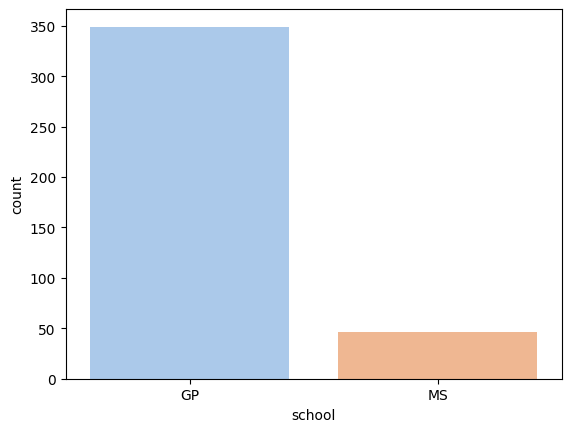

sex


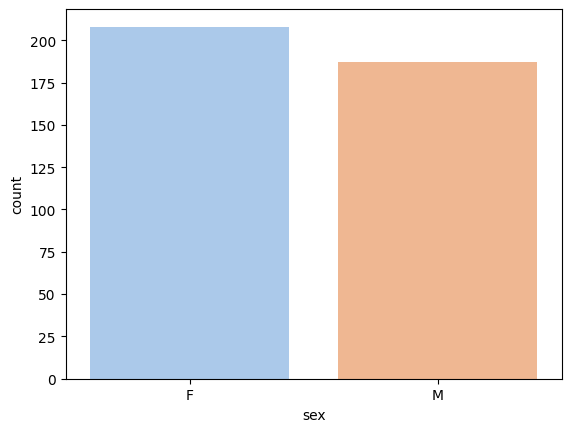

age


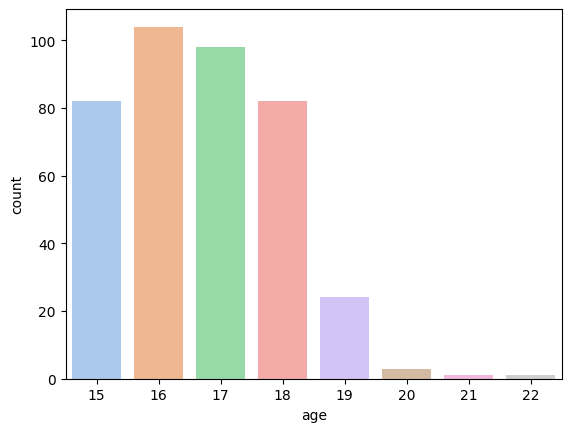

address


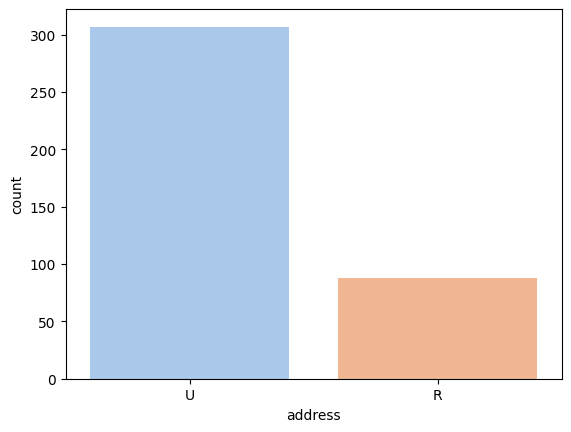

famsize


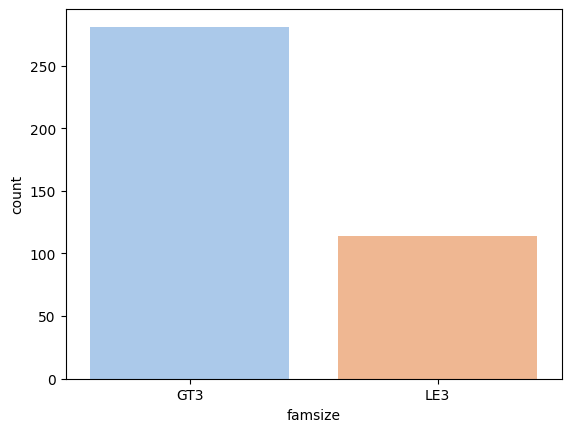

Pstatus


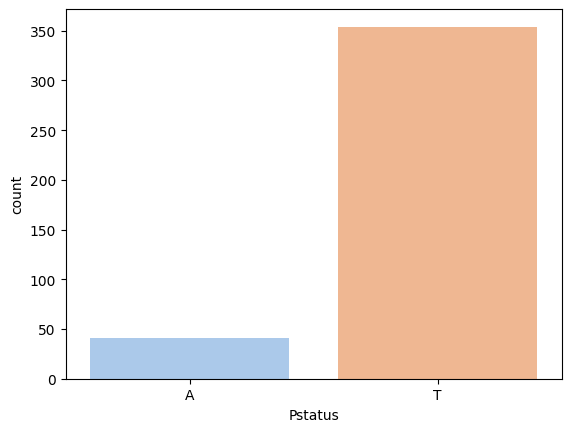

Medu


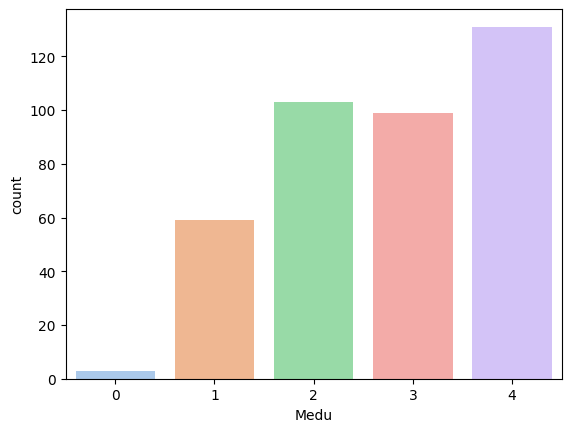

Fedu


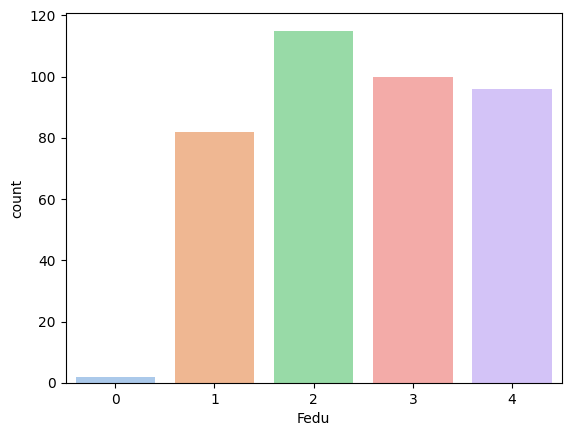

Mjob


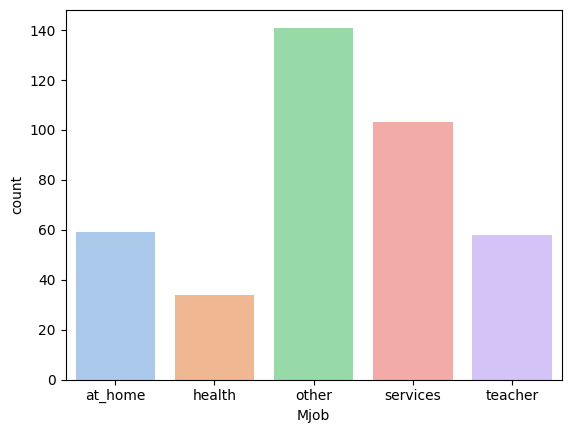

Fjob


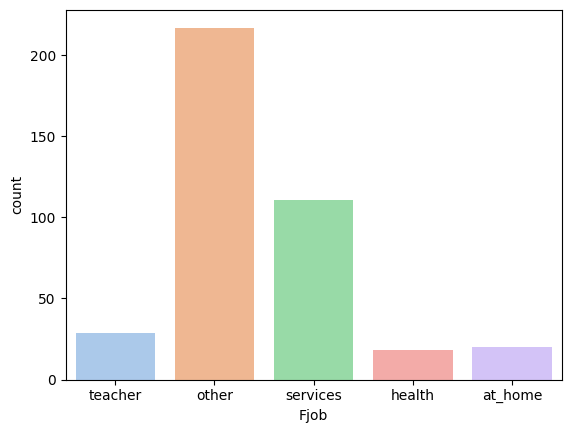

reason


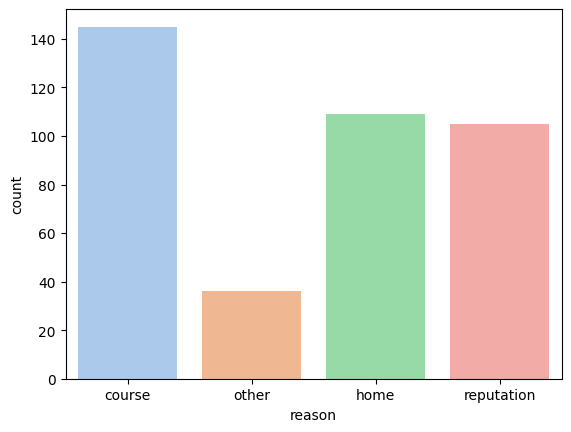

guardian


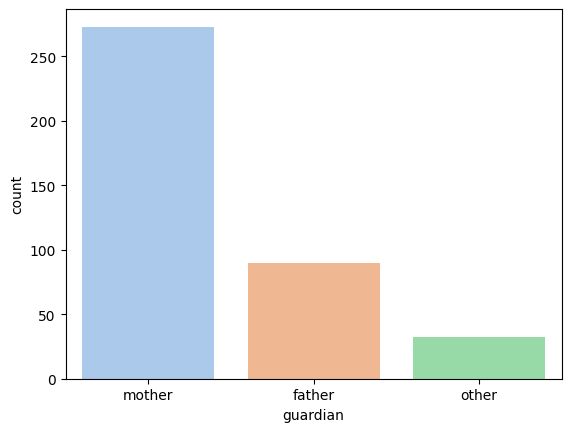

traveltime


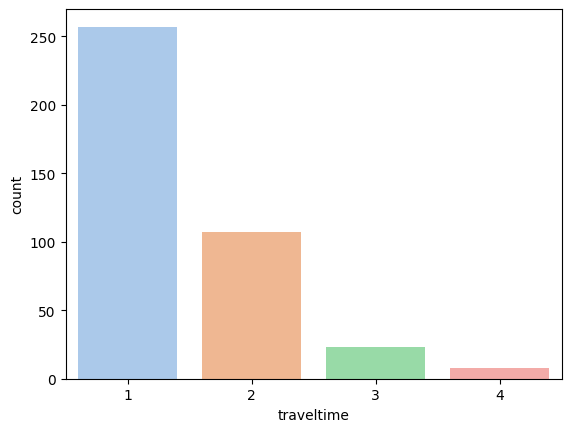

studytime


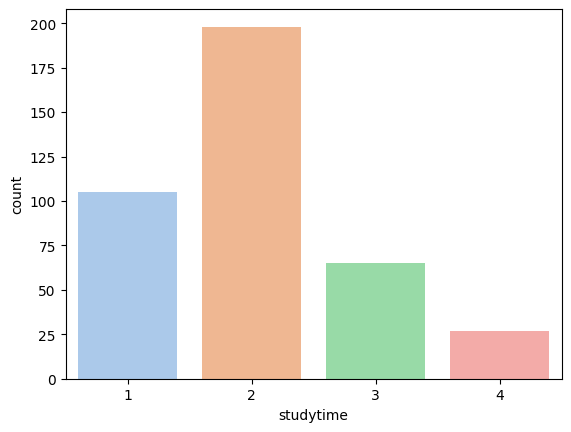

failures


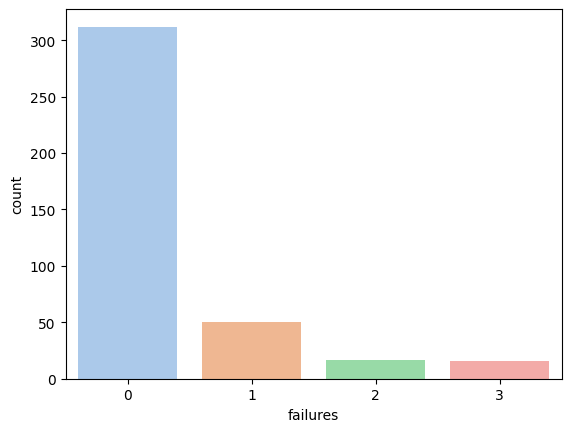

schoolsup


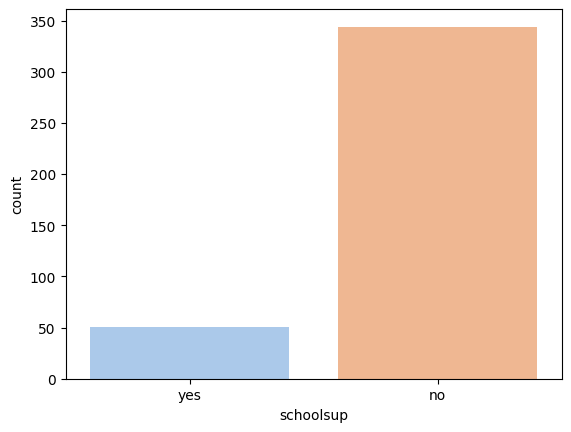

famsup


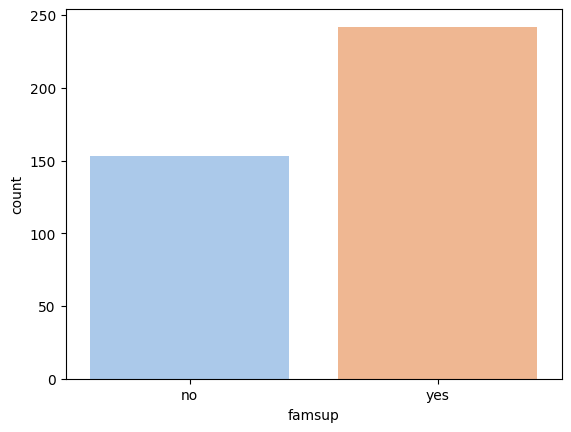

paid


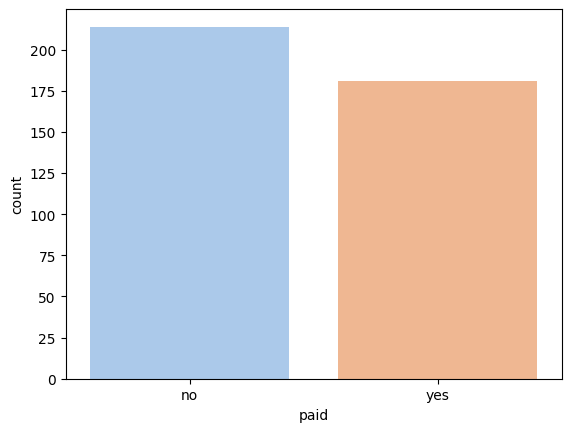

activities


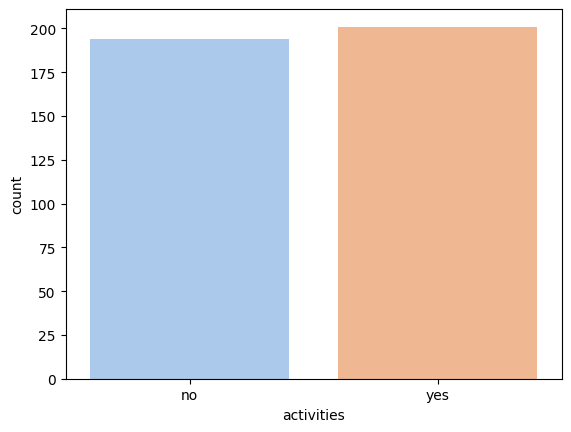

nursery


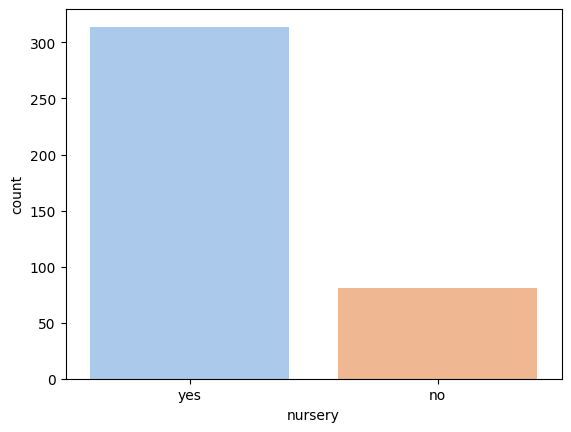

higher


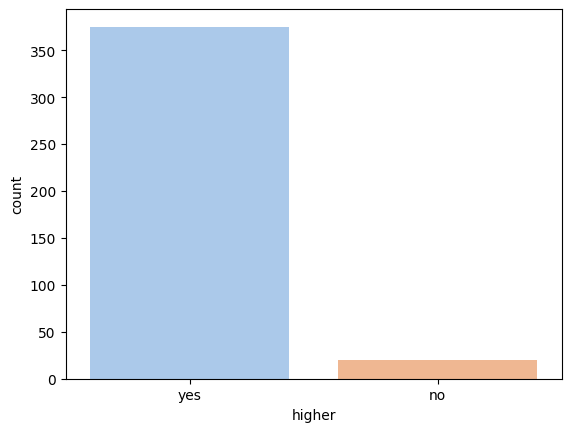

internet


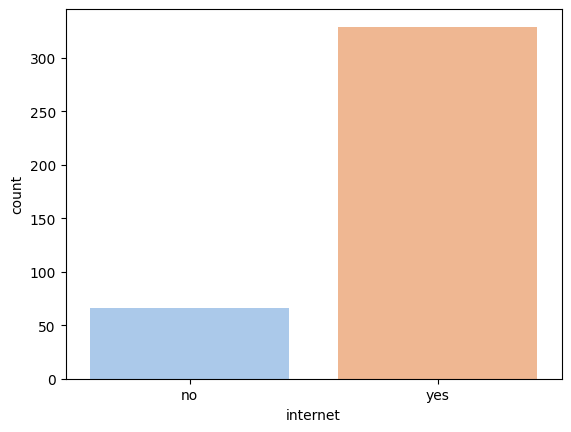

romantic


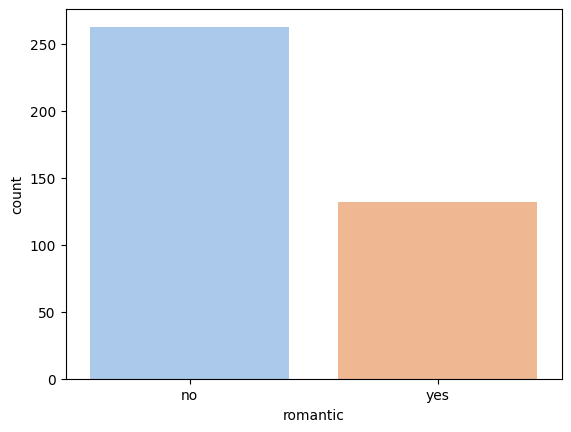

famrel


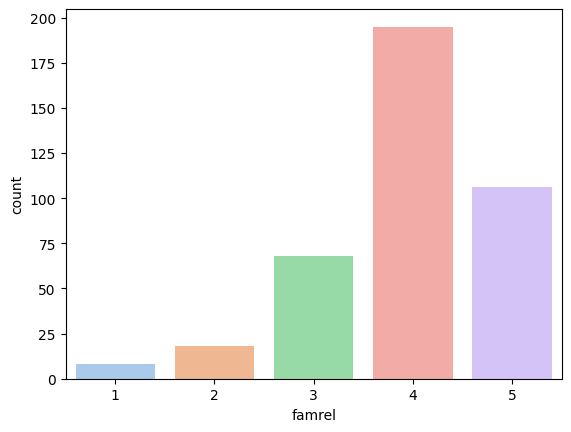

freetime


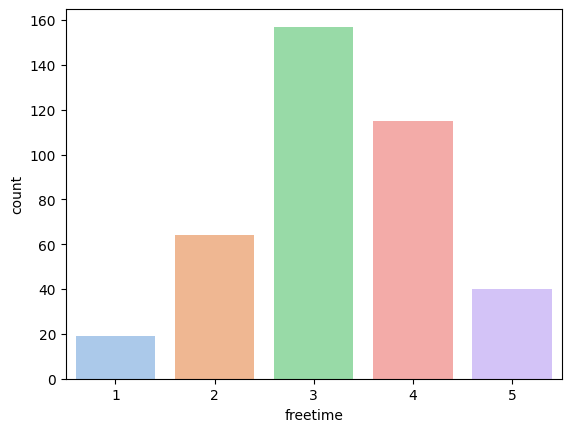

goout


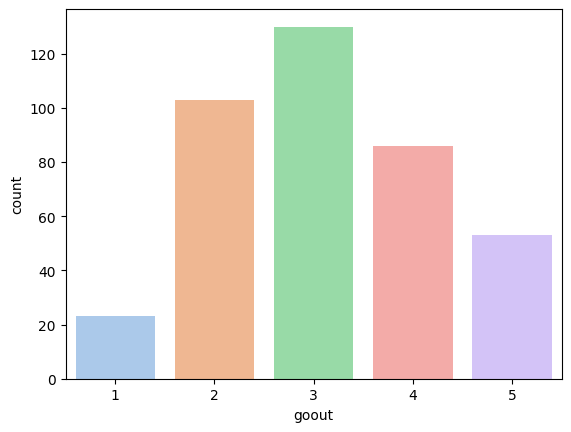

Dalc


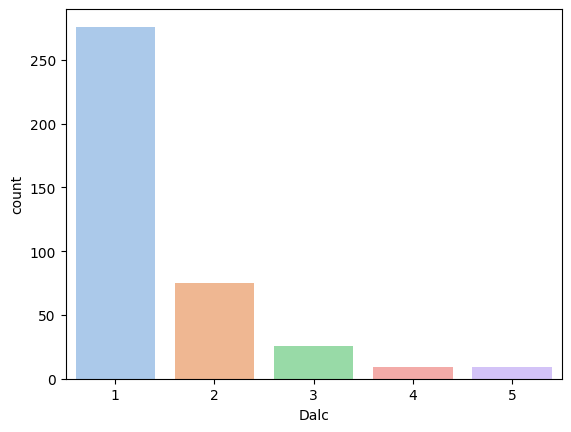

Walc


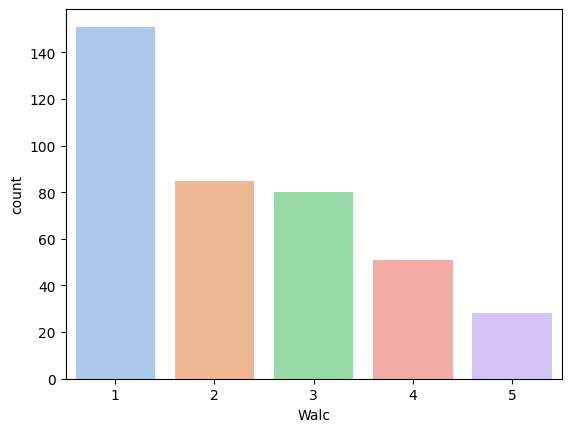

health


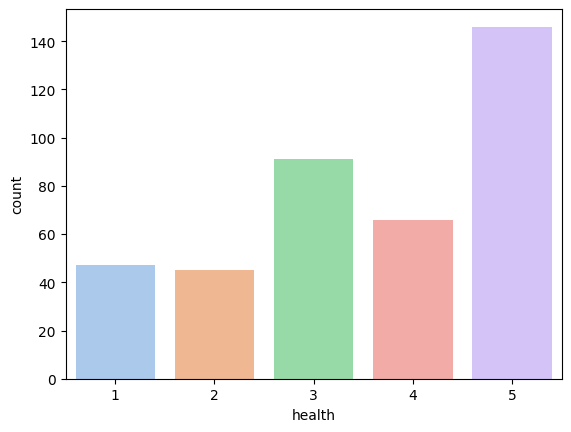

absences


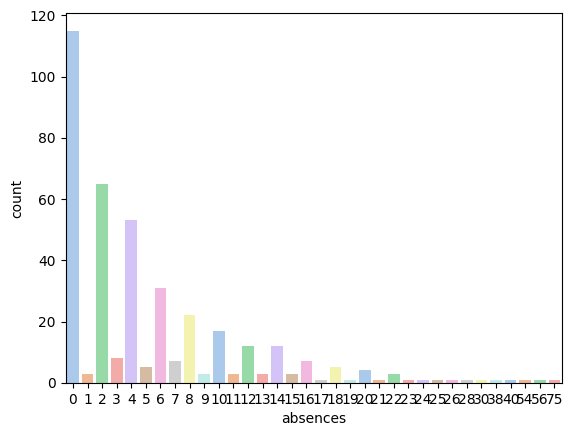

G1


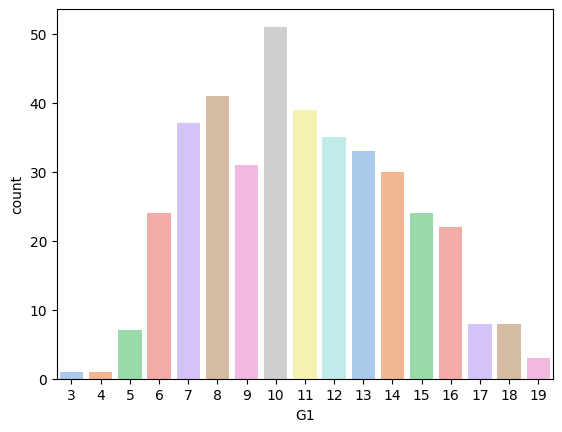

G2


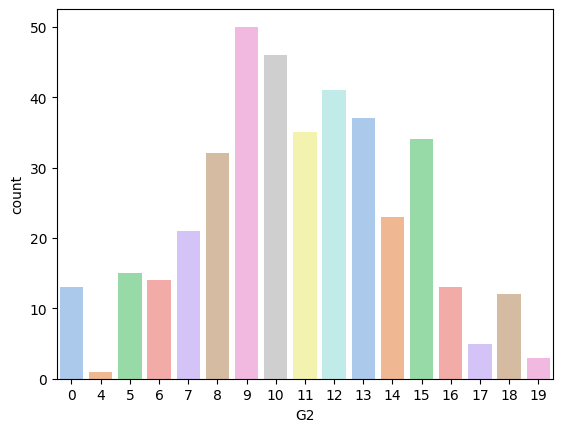

G3


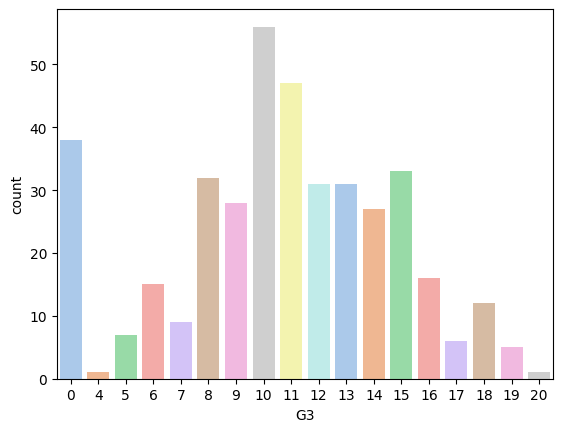

In [21]:
for x in cm :
    print(x)
    sns.countplot(data=dfm, x=x, palette="pastel")
    plt.show()
    """fig = plt.gcf()
    fig.savefig(f'{x}')"""

school


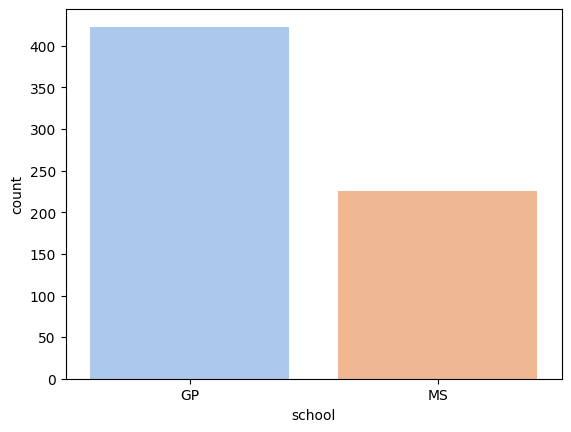

sex


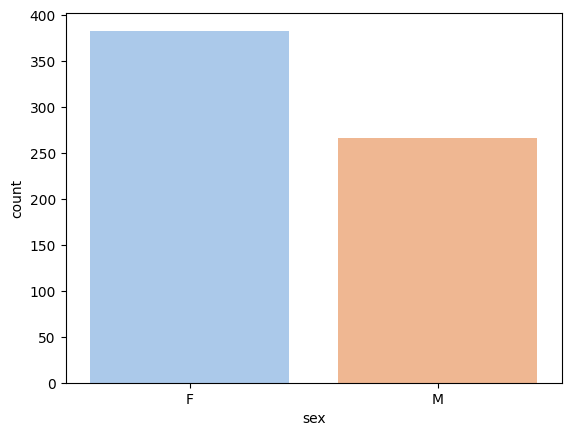

age


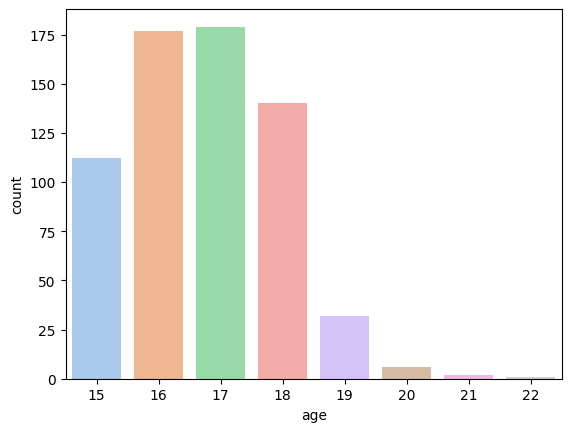

address


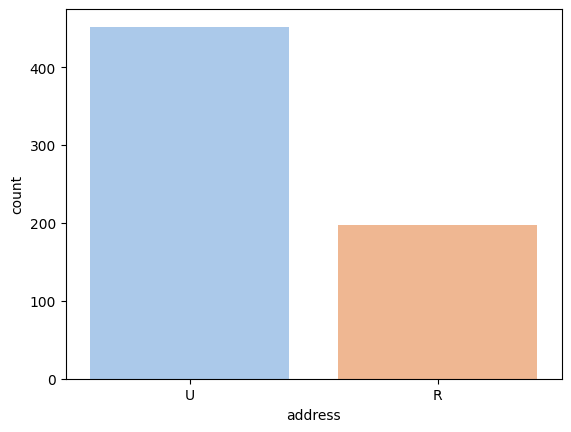

famsize


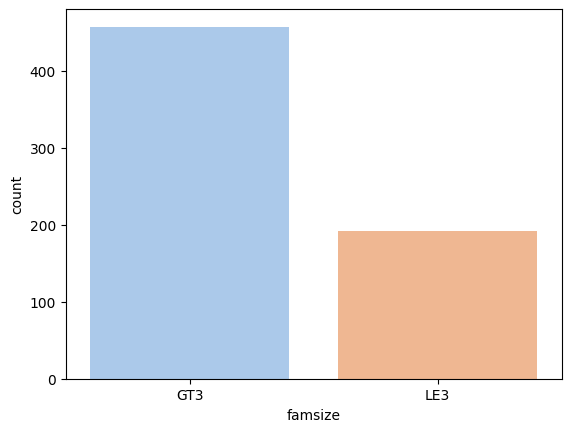

Pstatus


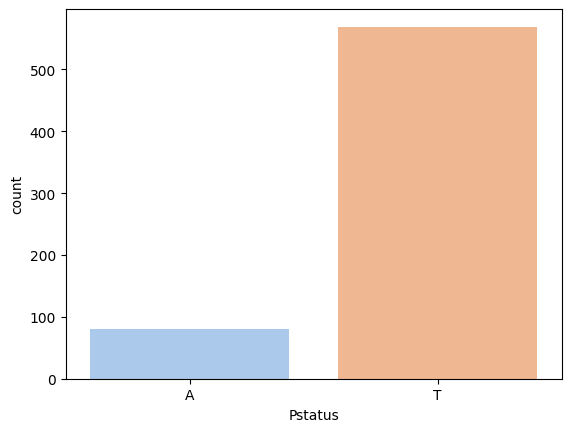

Medu


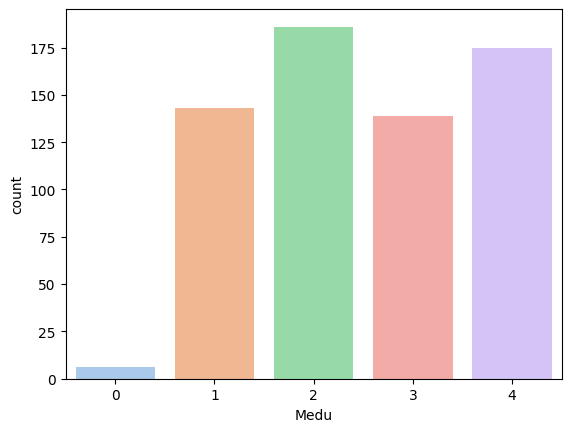

Fedu


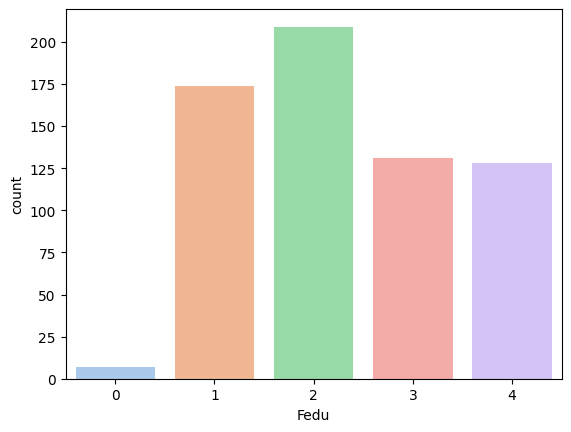

Mjob


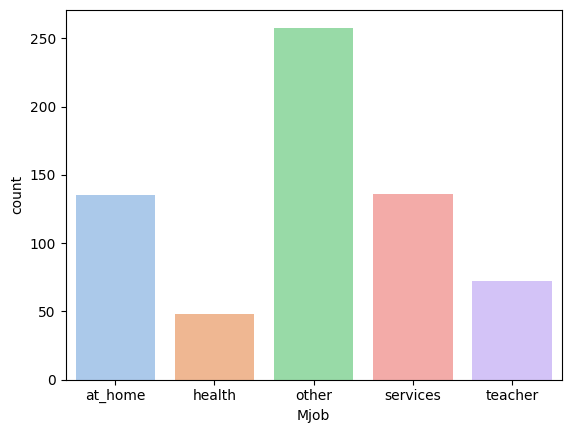

Fjob


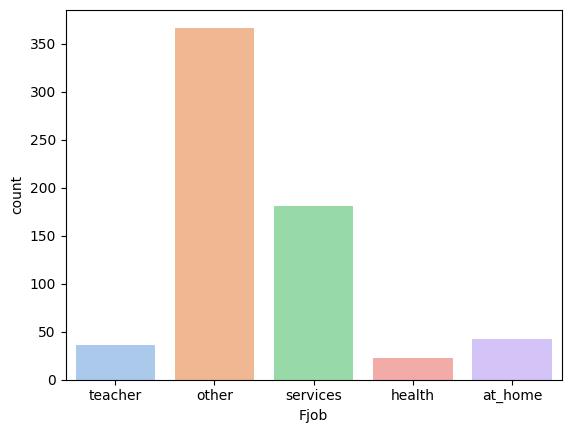

reason


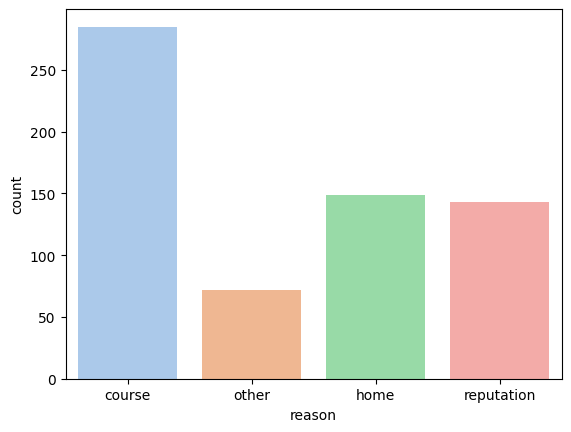

guardian


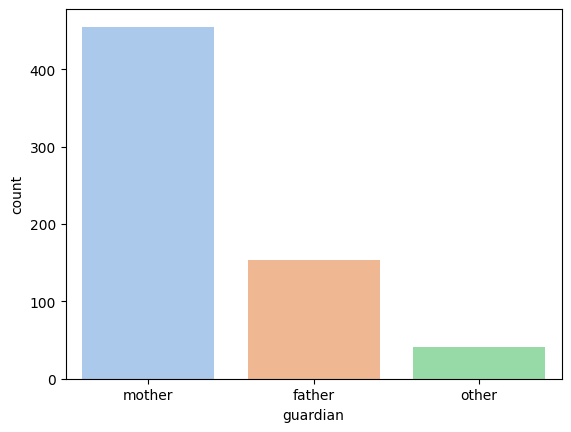

traveltime


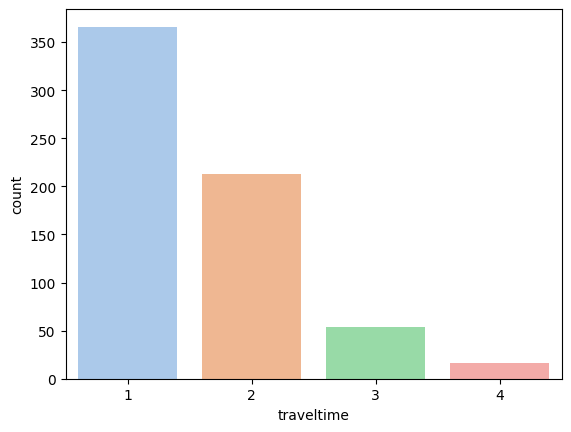

studytime


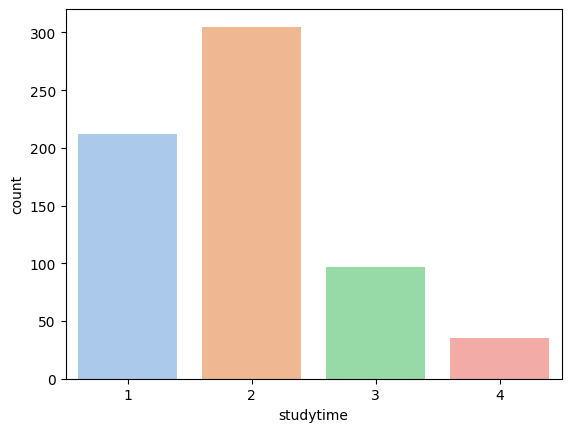

failures


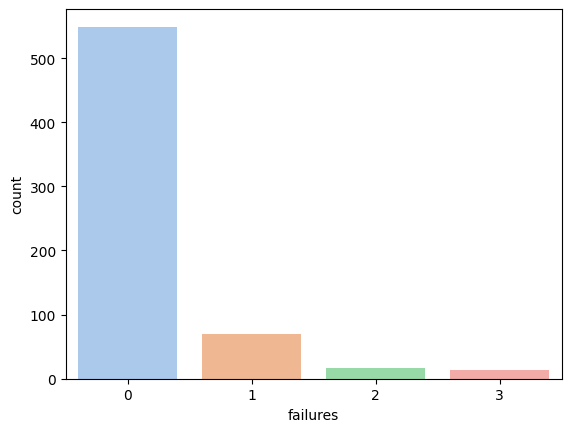

schoolsup


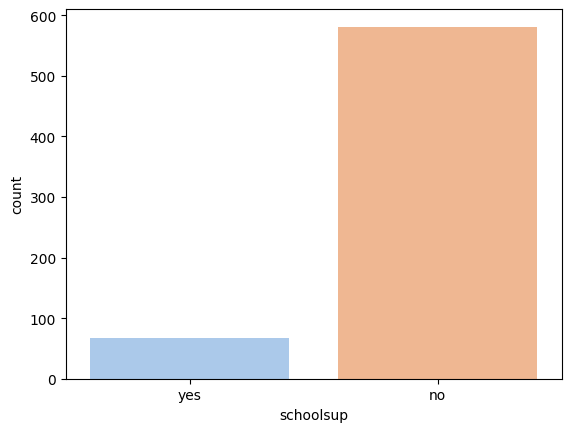

famsup


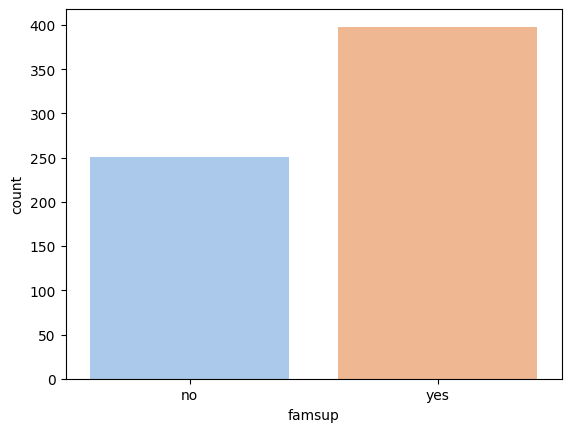

paid


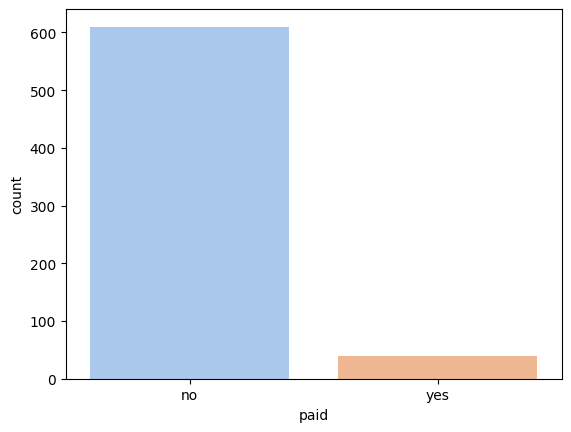

activities


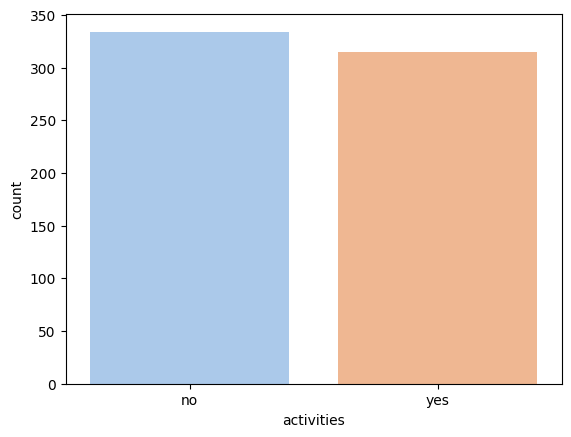

nursery


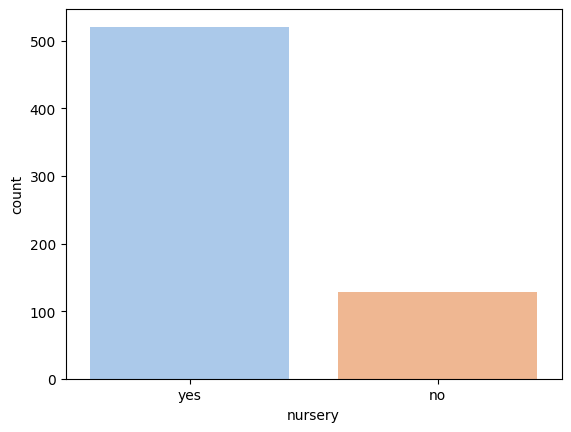

higher


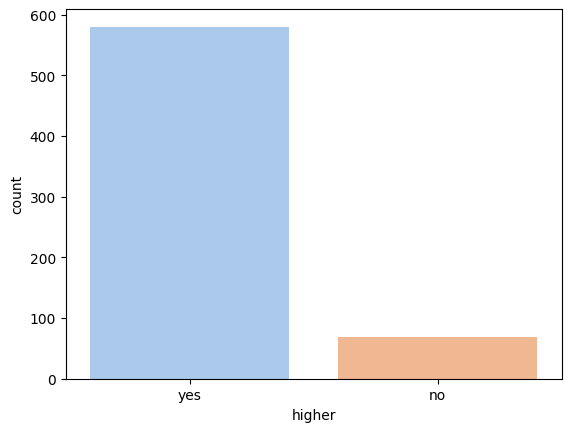

internet


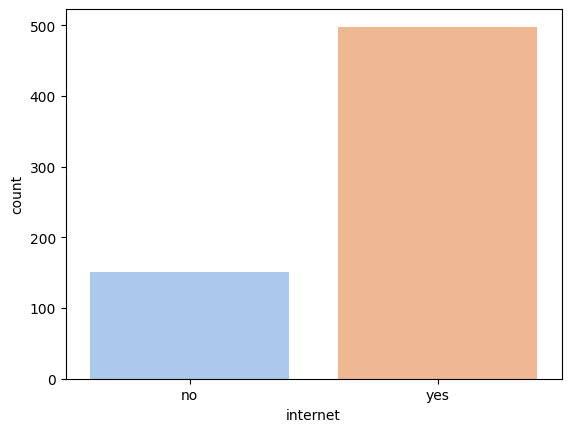

romantic


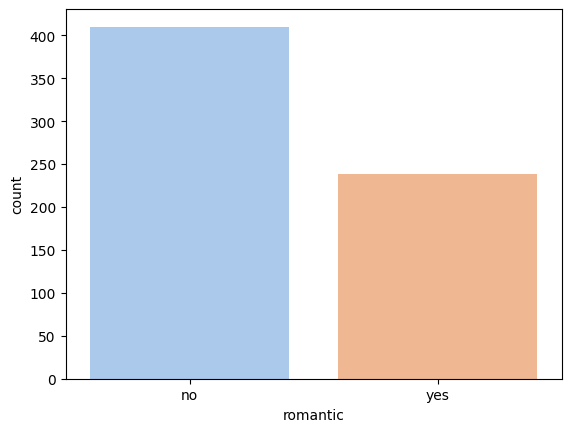

famrel


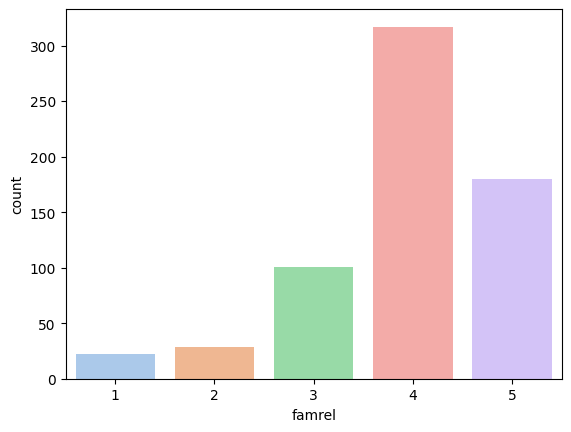

freetime


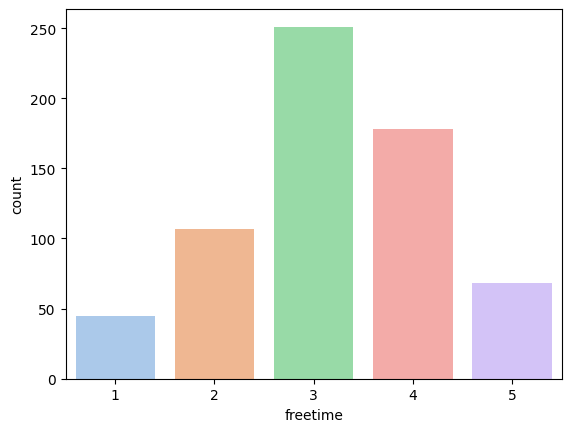

goout


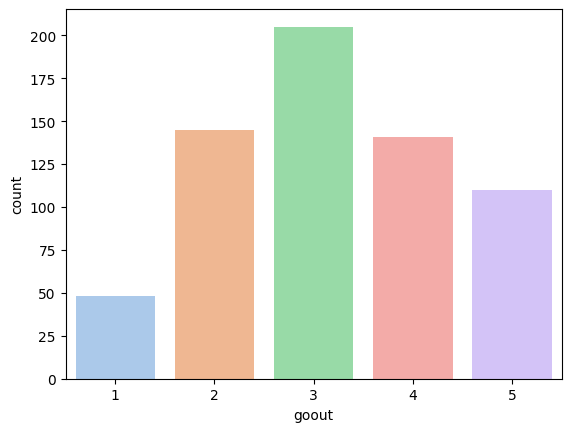

Dalc


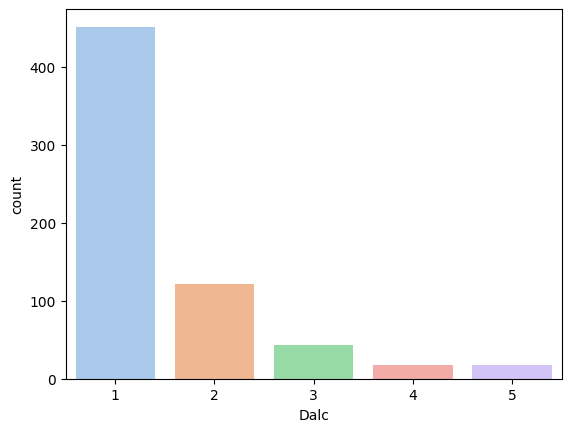

Walc


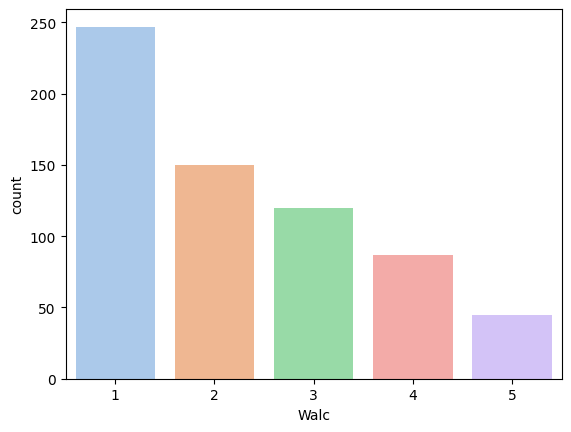

health


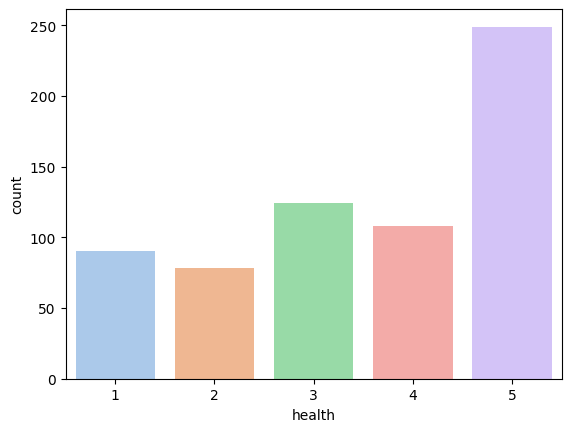

absences


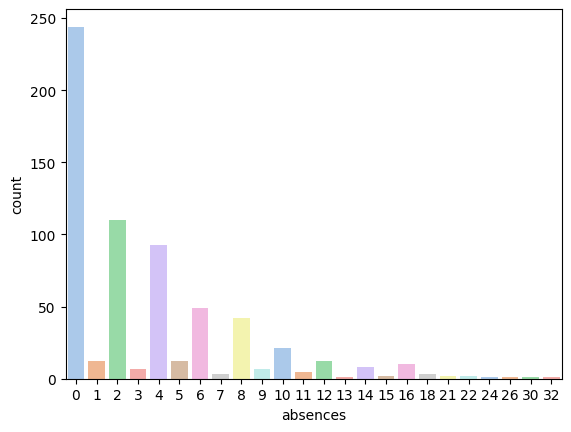

G1


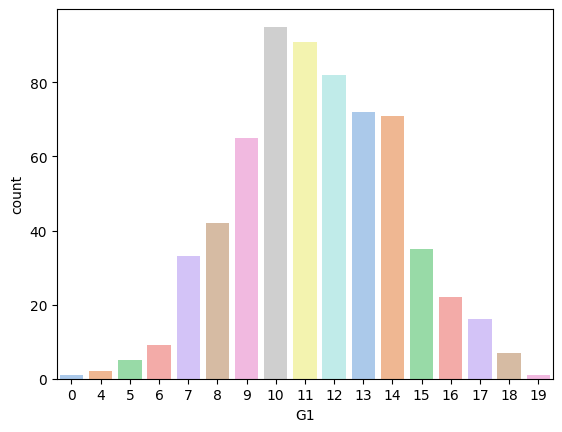

G2


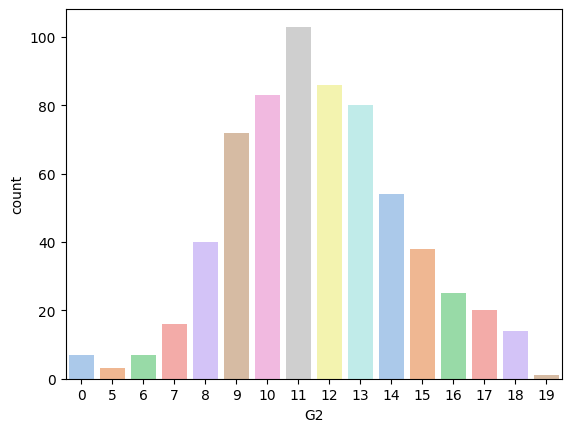

G3


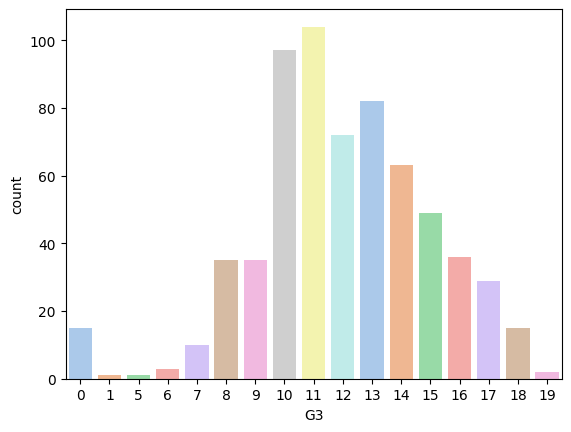

In [22]:
for x in cp :
    print(x)
    sns.countplot(data=dfp, x=x, palette="pastel" )
    plt.show()
    """fig = plt.gcf()
    fig.savefig(f'{x}')"""

/home/alexfvc/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


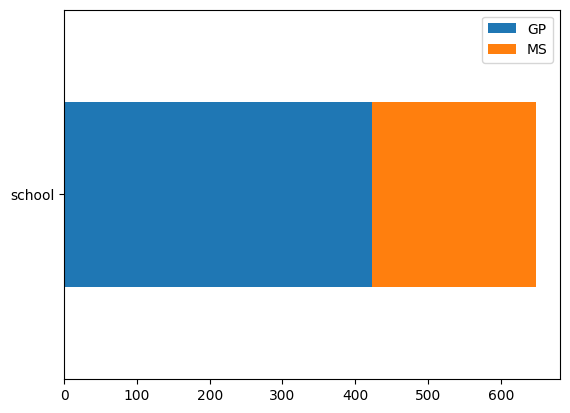

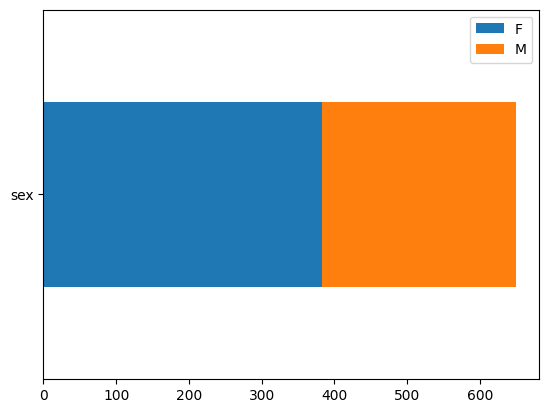

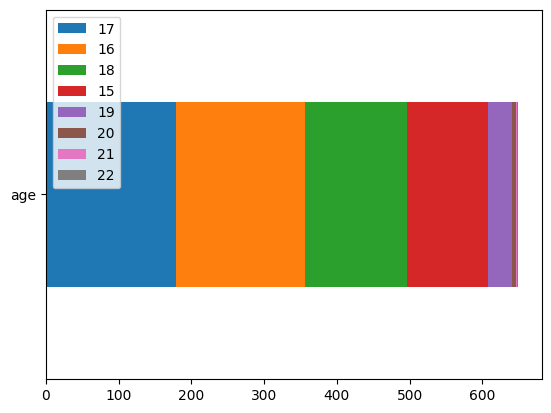

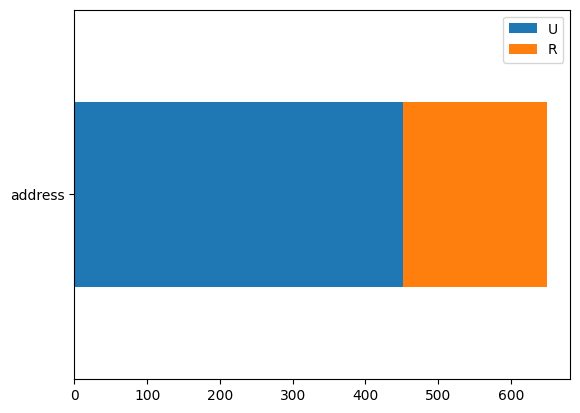

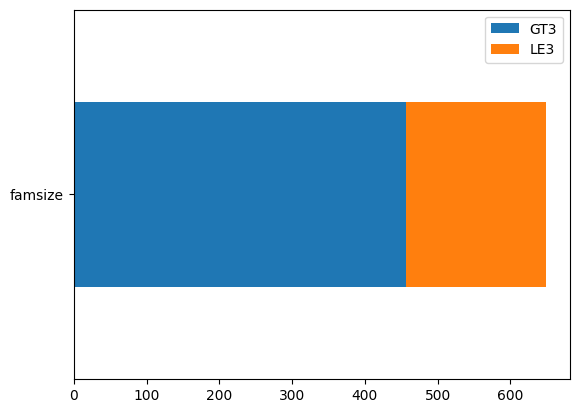

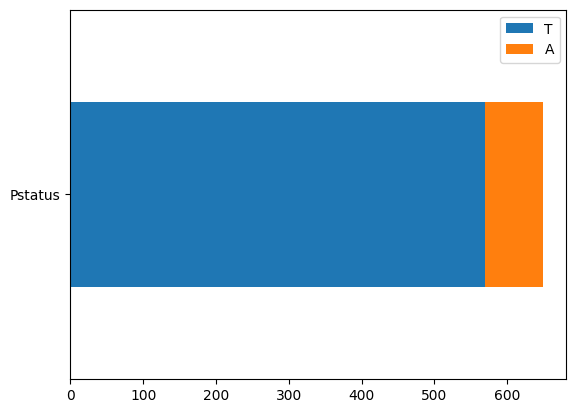

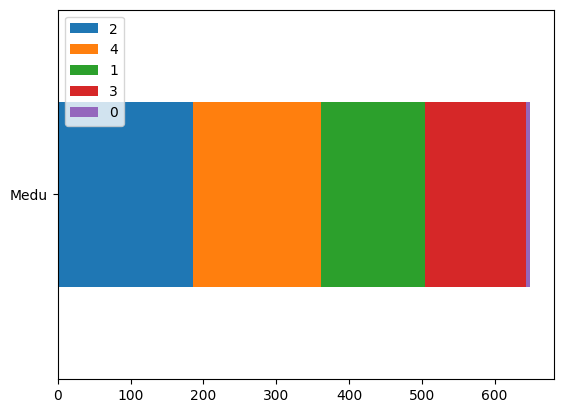

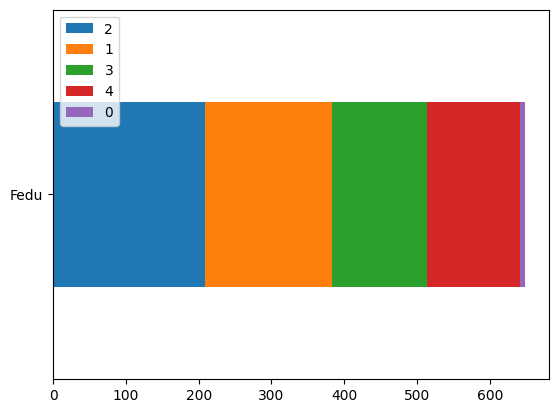

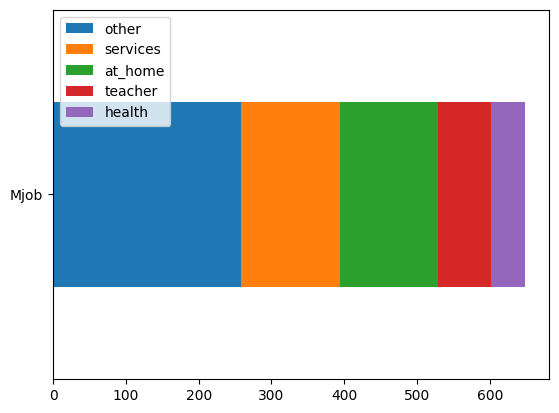

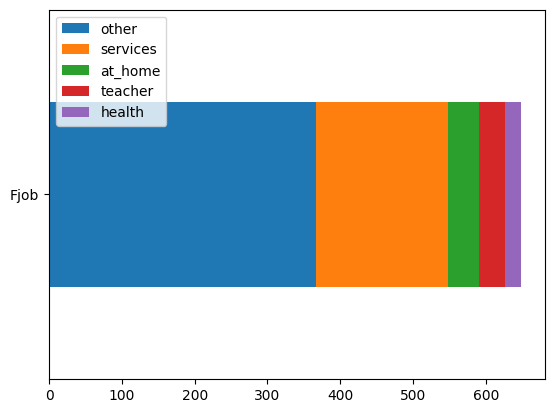

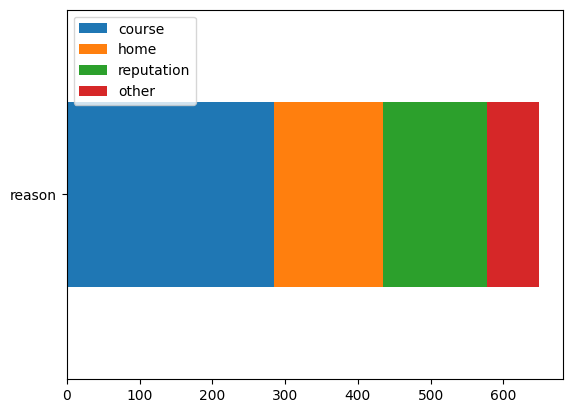

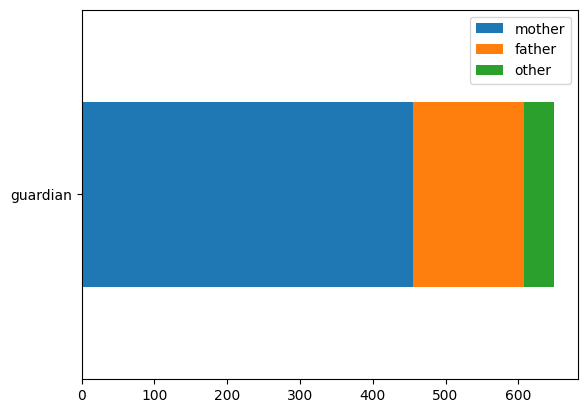

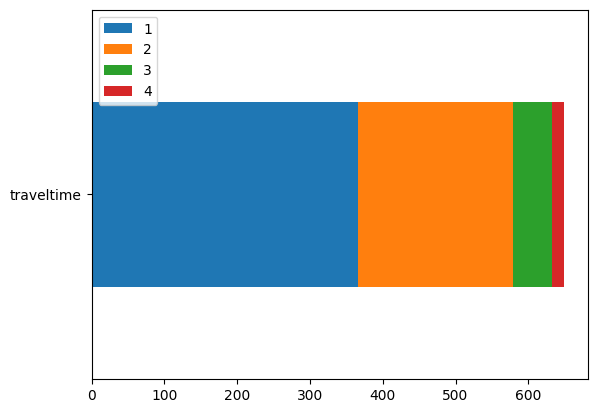

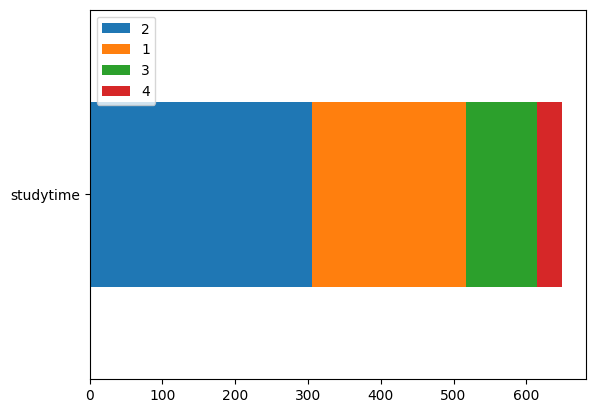

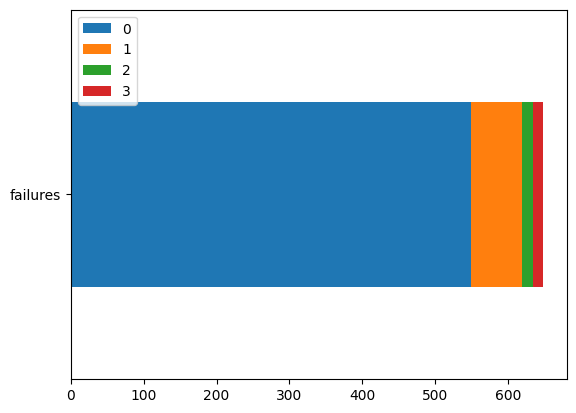

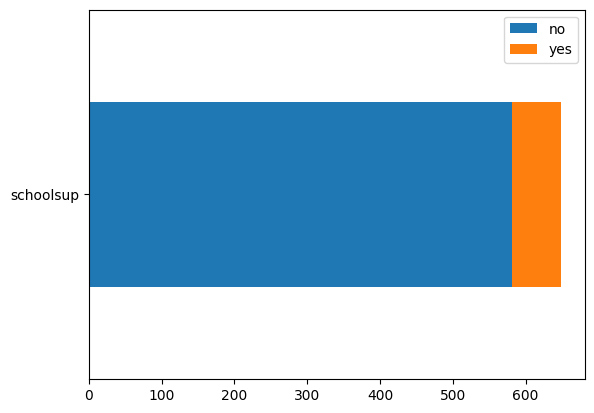

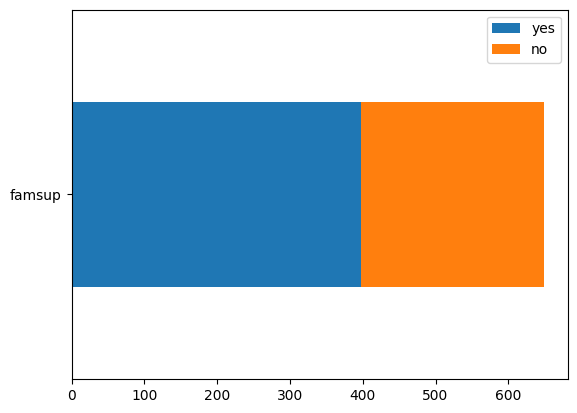

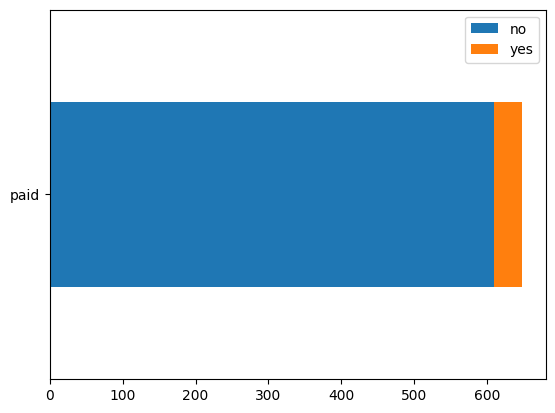

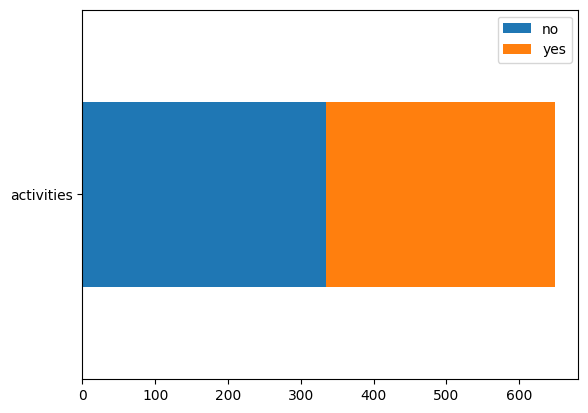

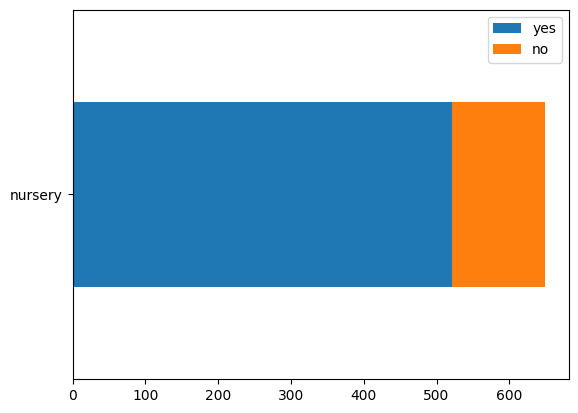

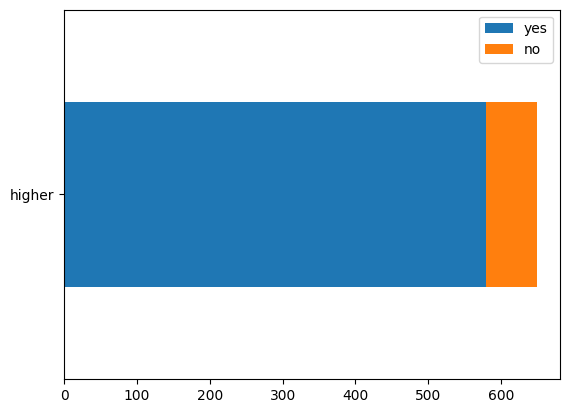

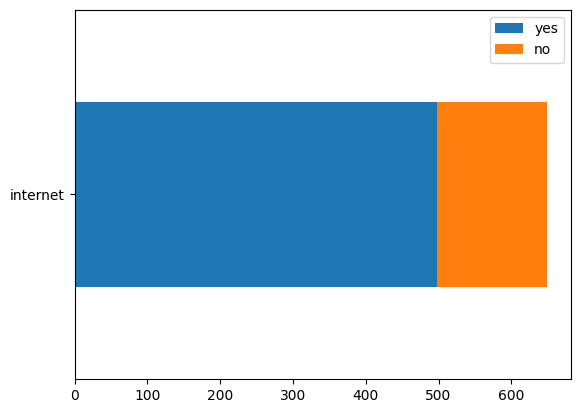

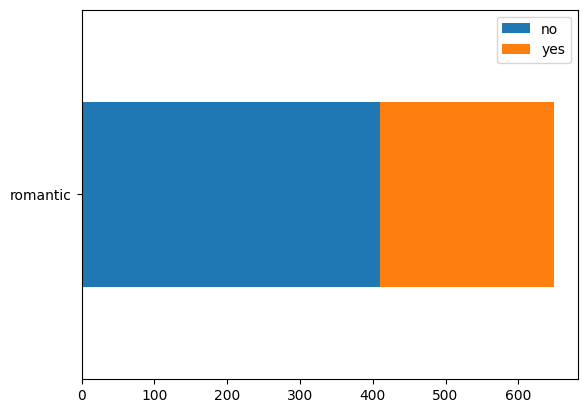

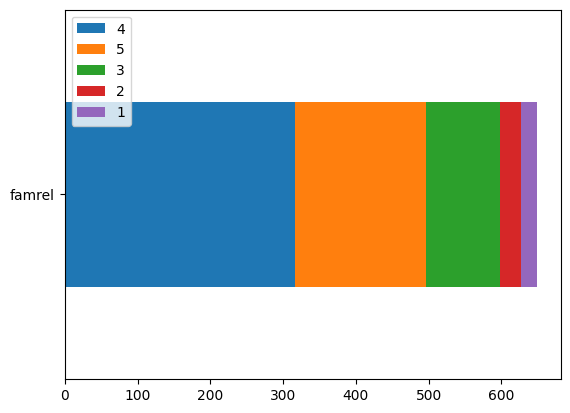

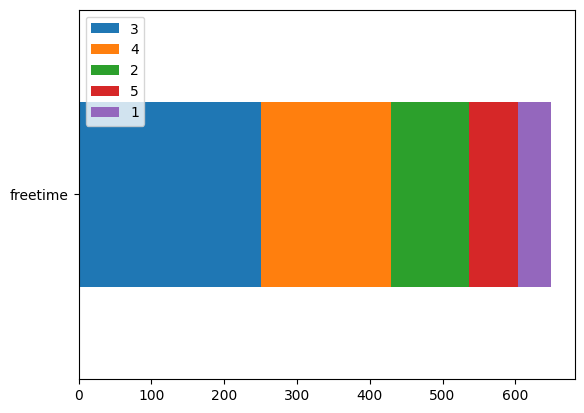

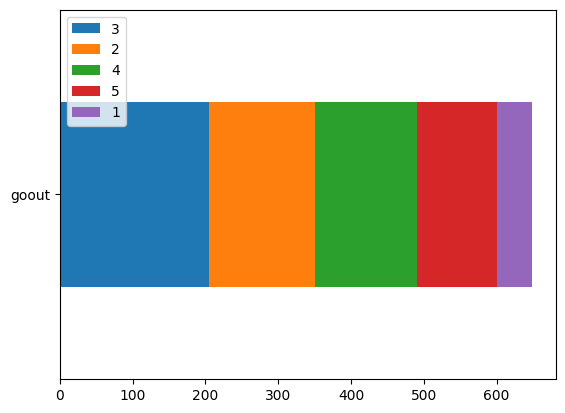

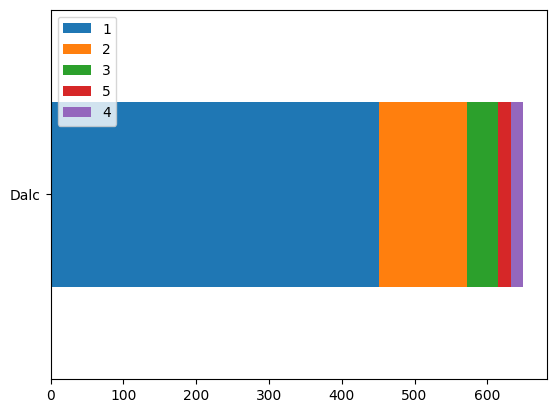

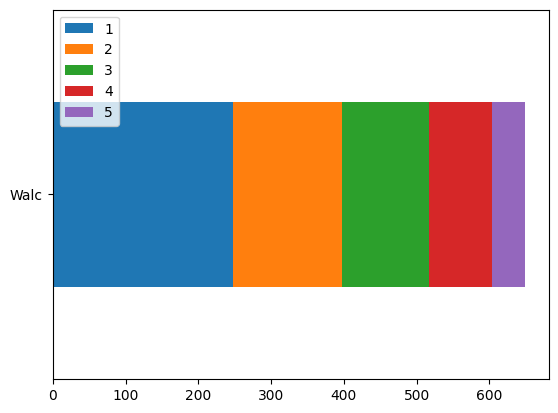

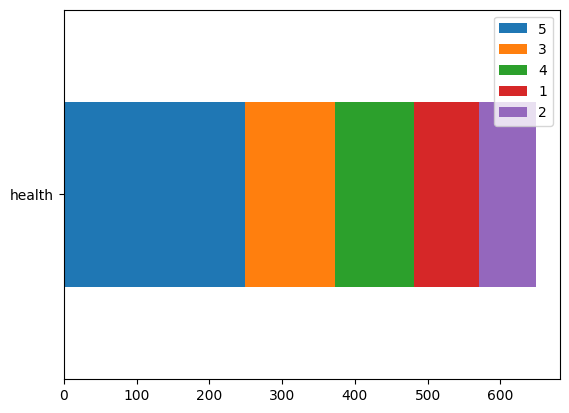

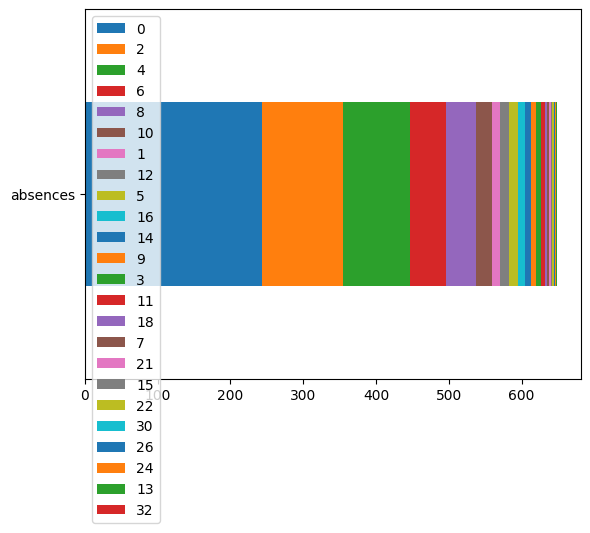

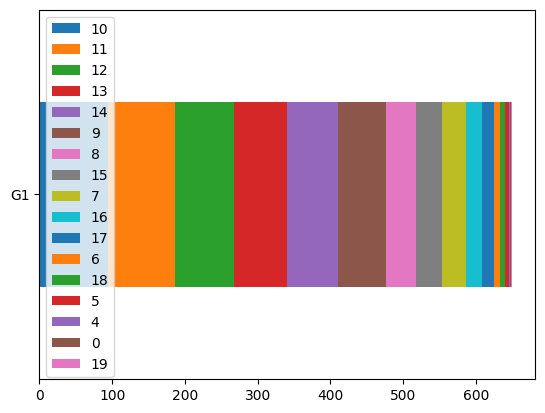

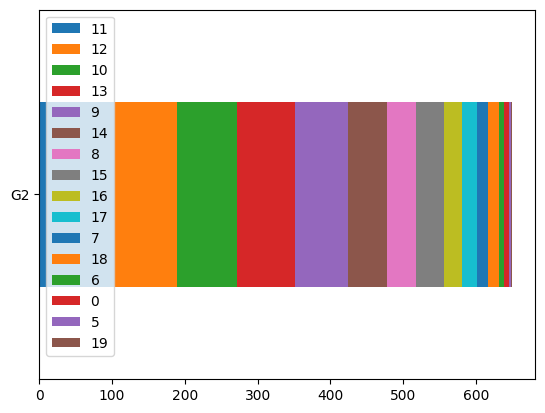

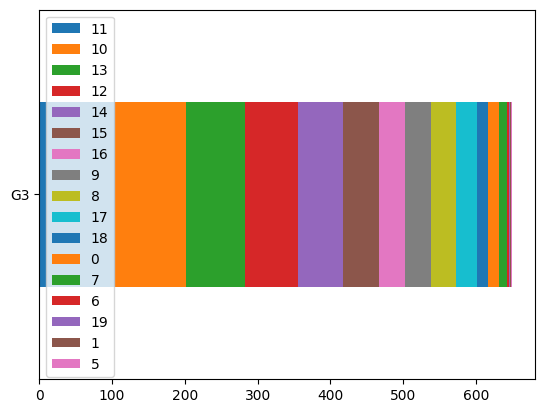

In [23]:
for x in cp:
    dfx = dfp[x].value_counts()
    colunas = dfx.index.to_list()
    valores = dfx.values
    df1 = pd.DataFrame([valores], columns=colunas,index=(x,1,2,3,4,5,6))
    df1.drop(index=[1,2,3,4,5,6],inplace=True)
    df1.plot.barh(stacked=True)

/home/alexfvc/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


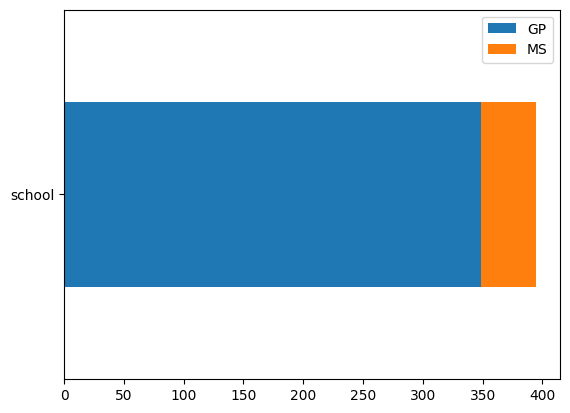

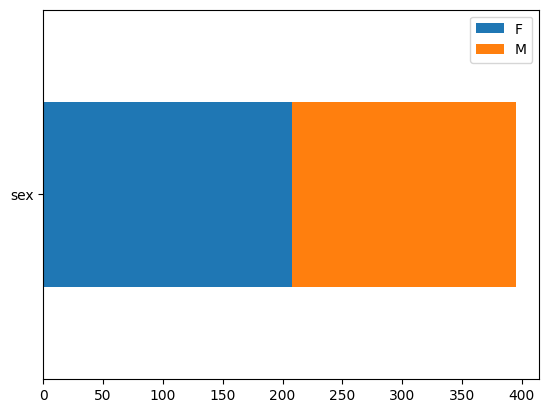

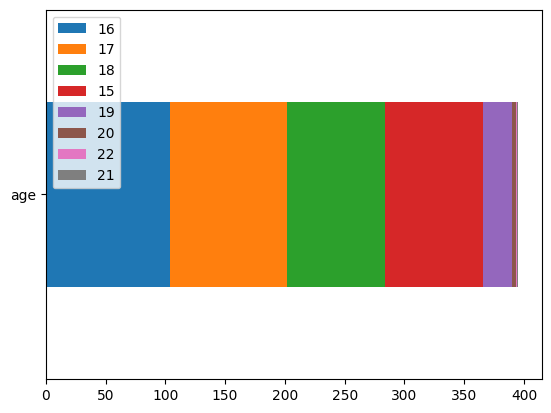

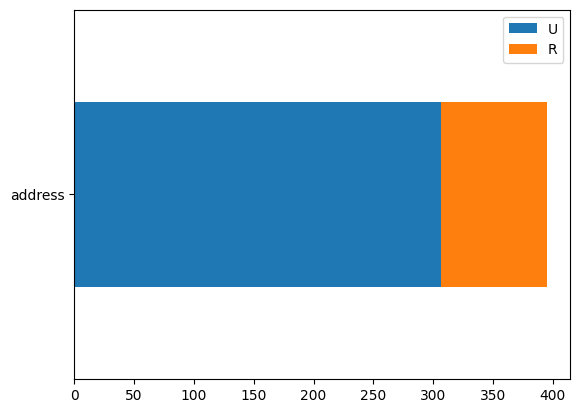

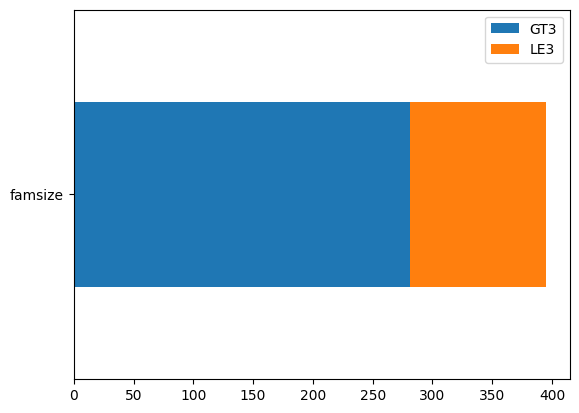

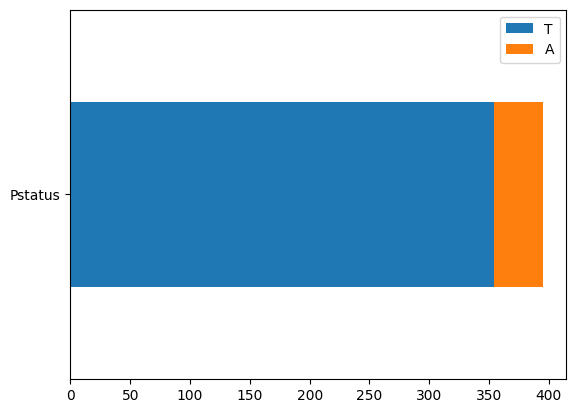

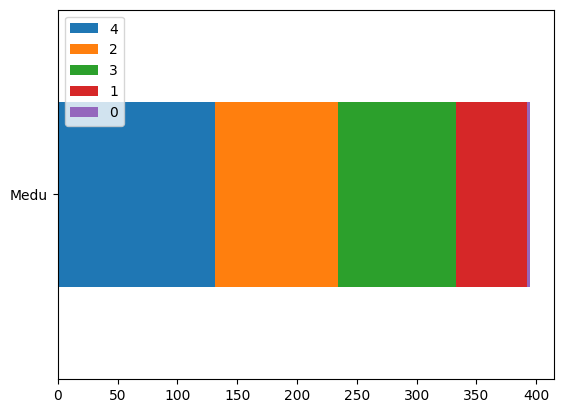

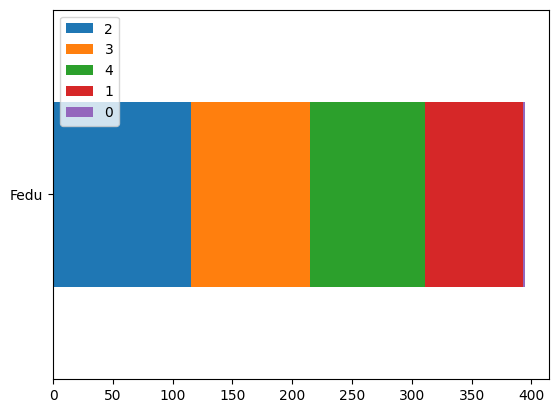

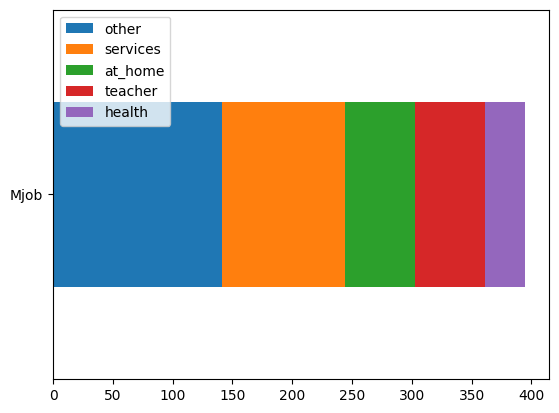

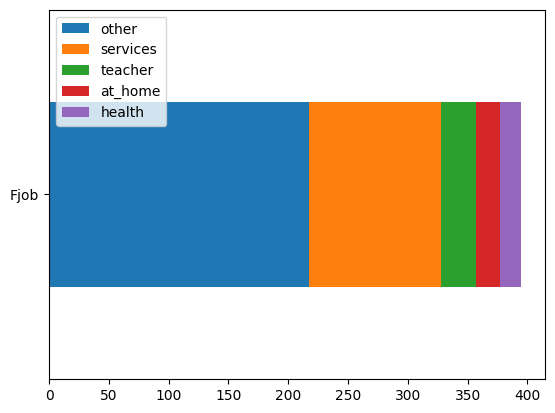

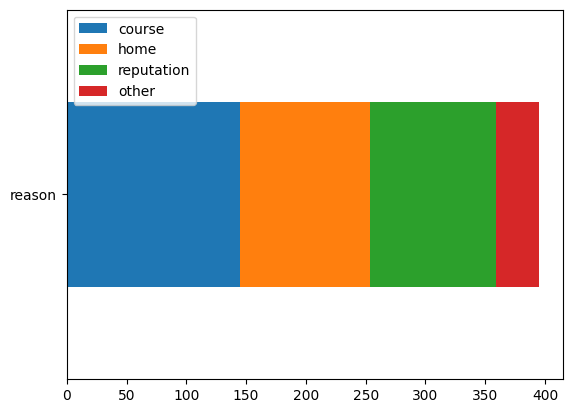

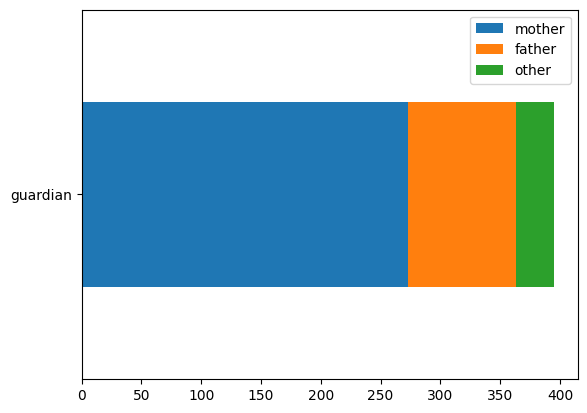

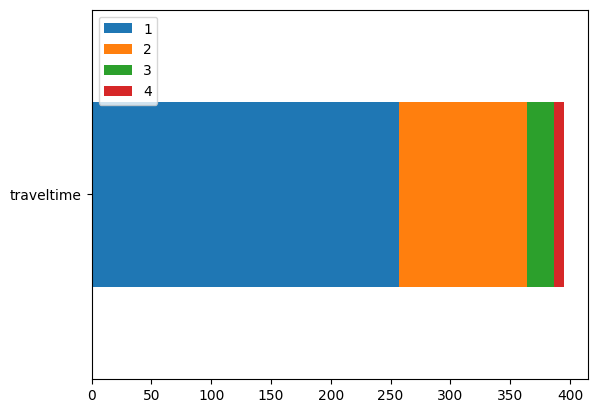

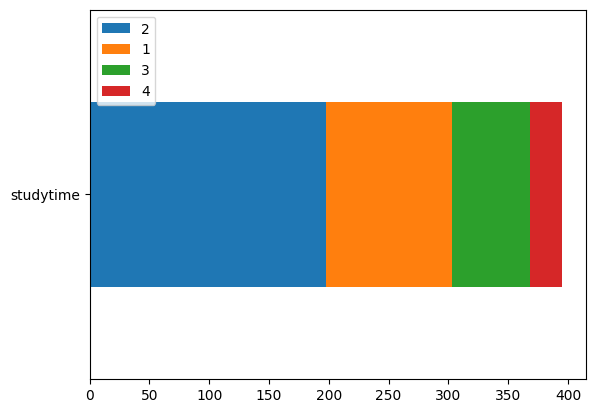

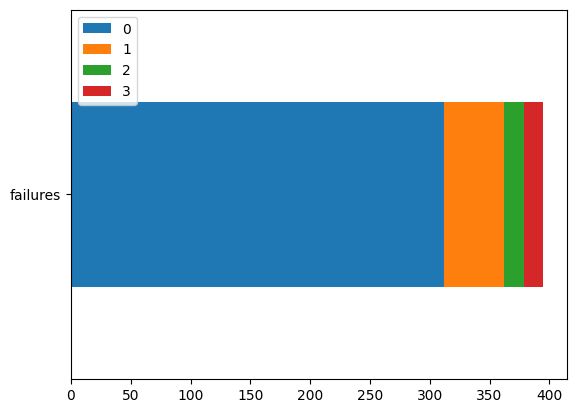

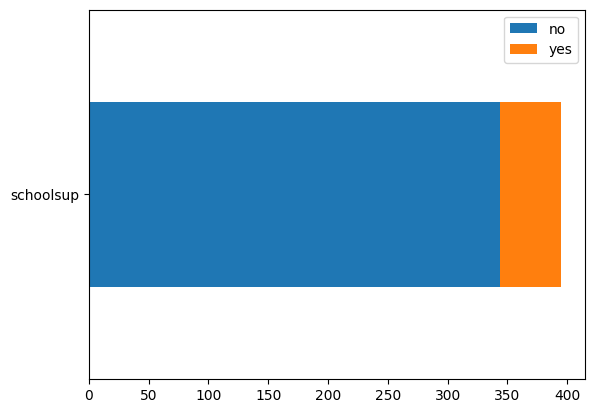

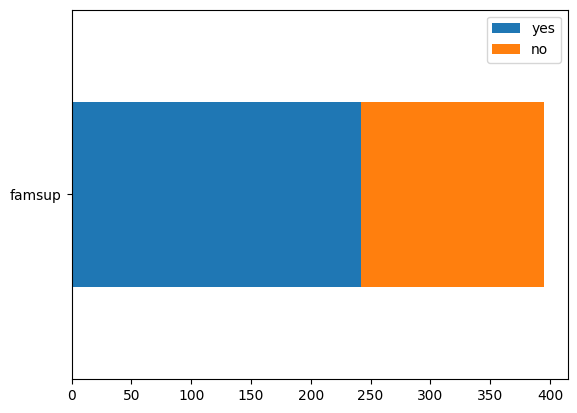

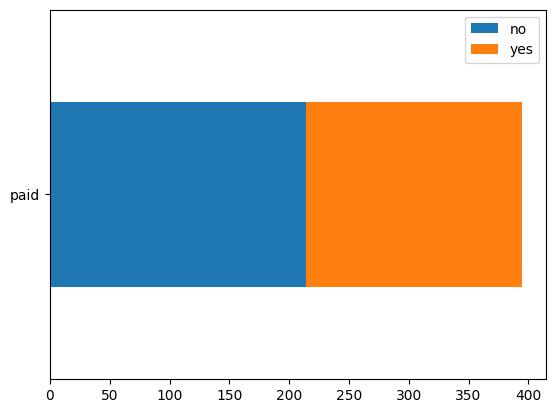

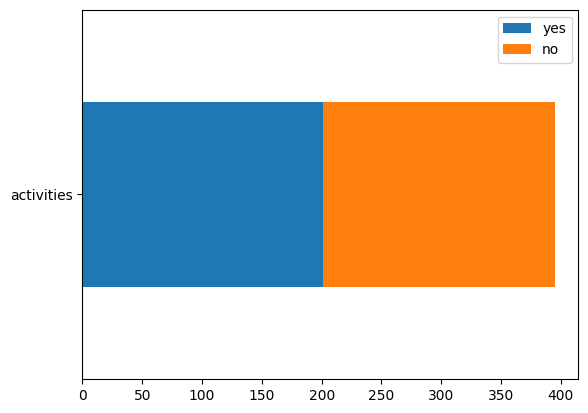

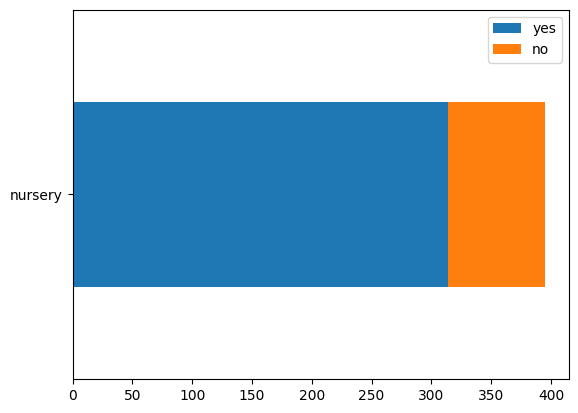

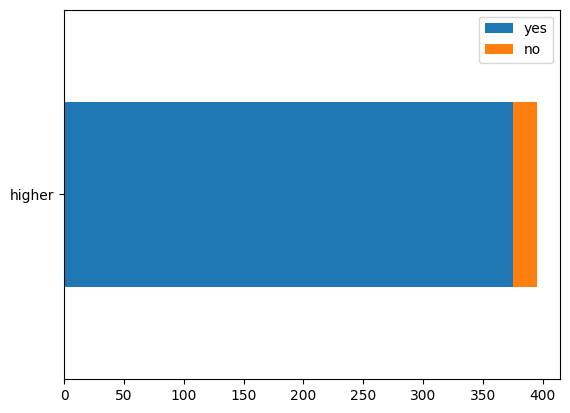

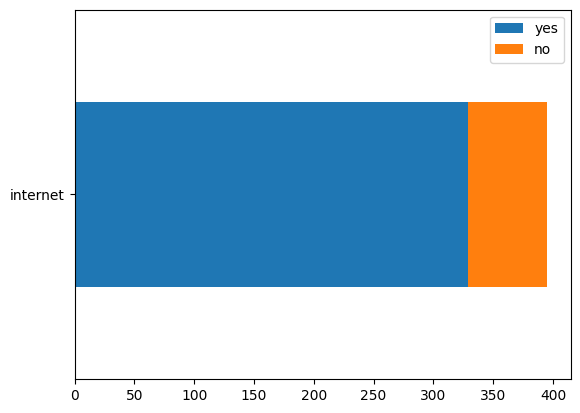

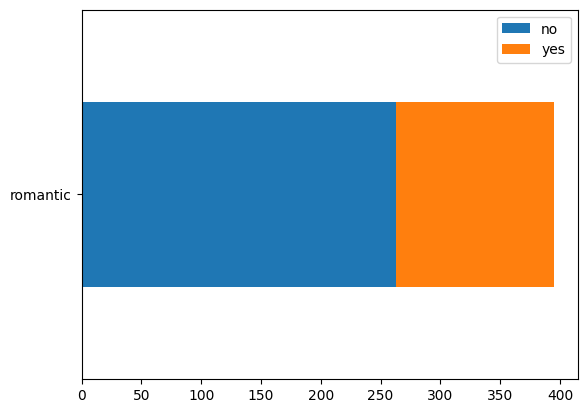

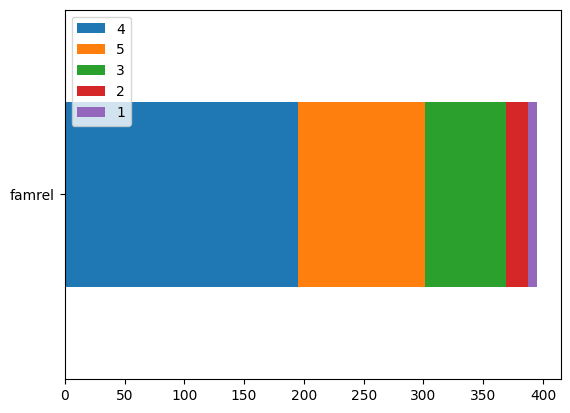

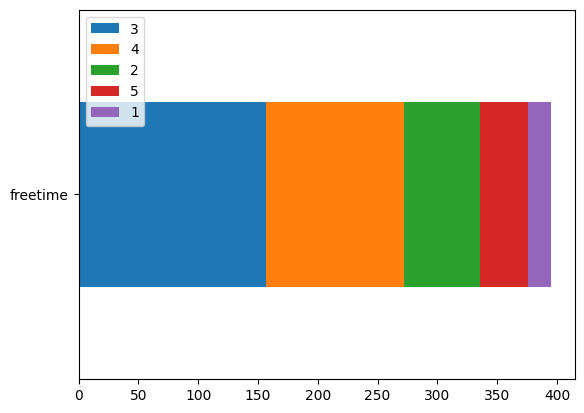

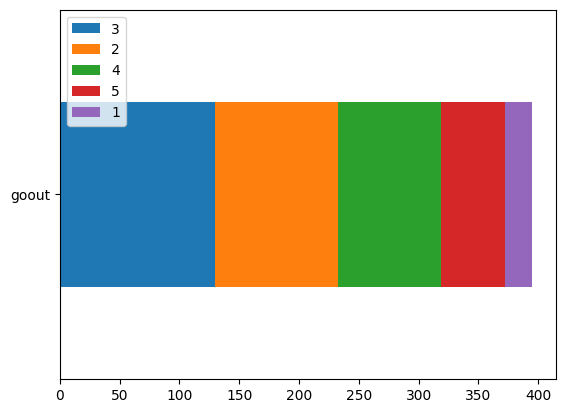

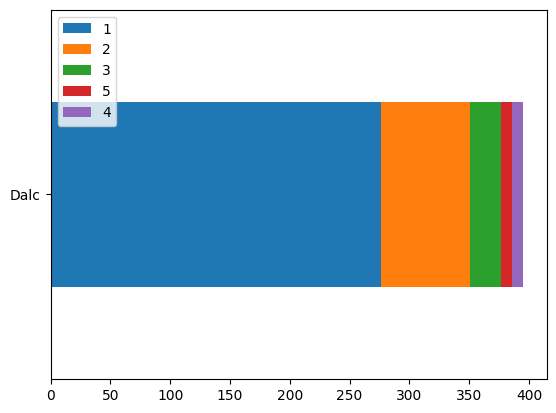

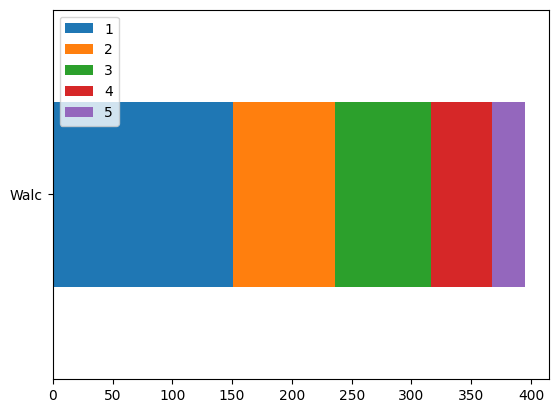

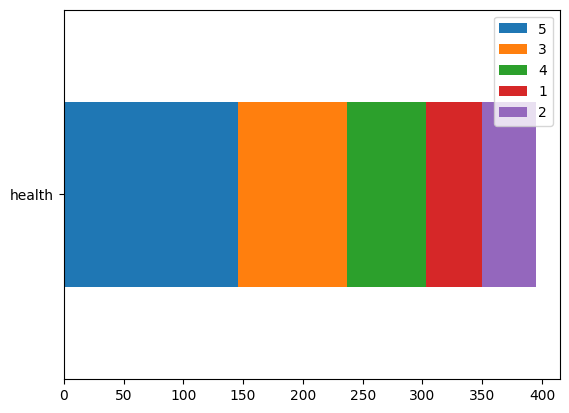

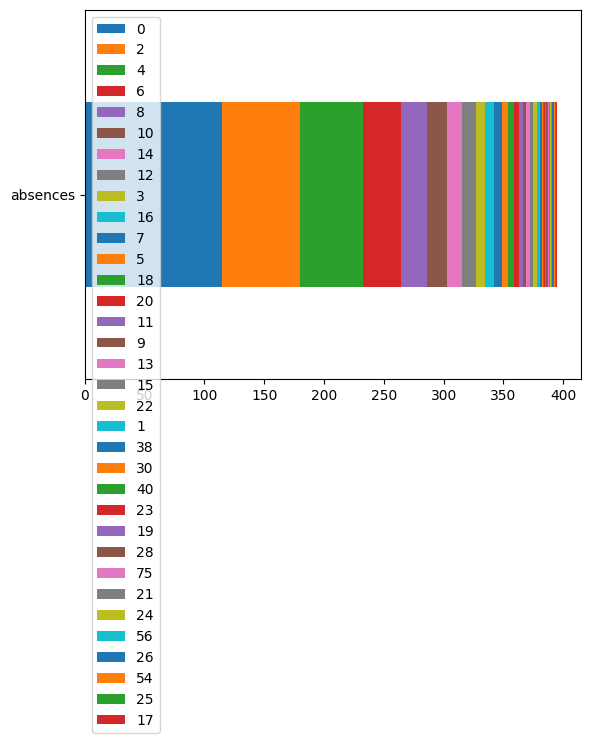

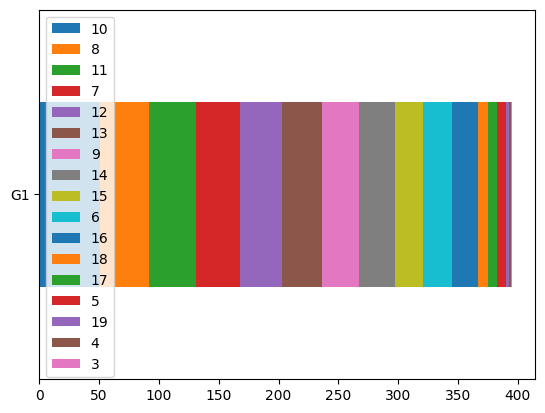

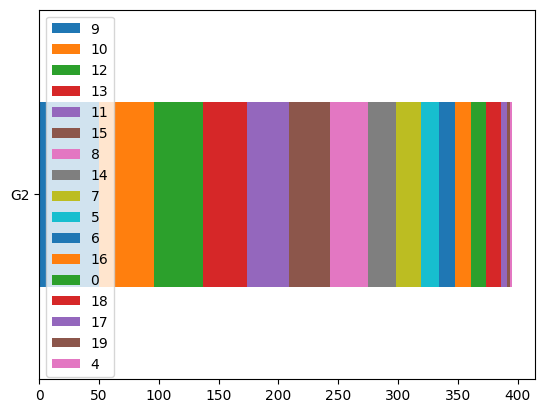

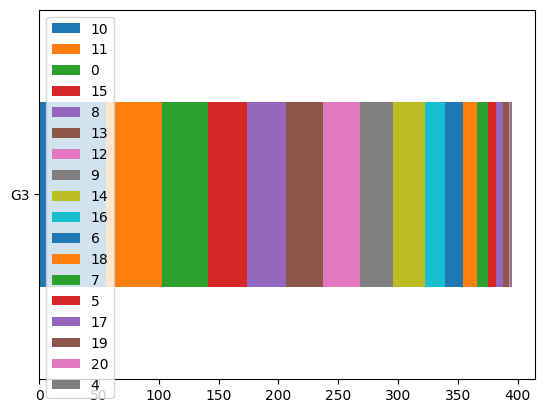

In [24]:
for x in cm:
    dfx = dfm[x].value_counts()
    colunas = dfx.index.to_list()
    valores = dfx.values
    df1 = pd.DataFrame([valores], columns=colunas,index=(x,1,2,3,4,5,6))
    df1.drop(index=[1,2,3,4,5,6],inplace=True)
    df1.plot.barh(stacked=True)

correlação dfm method= pearson


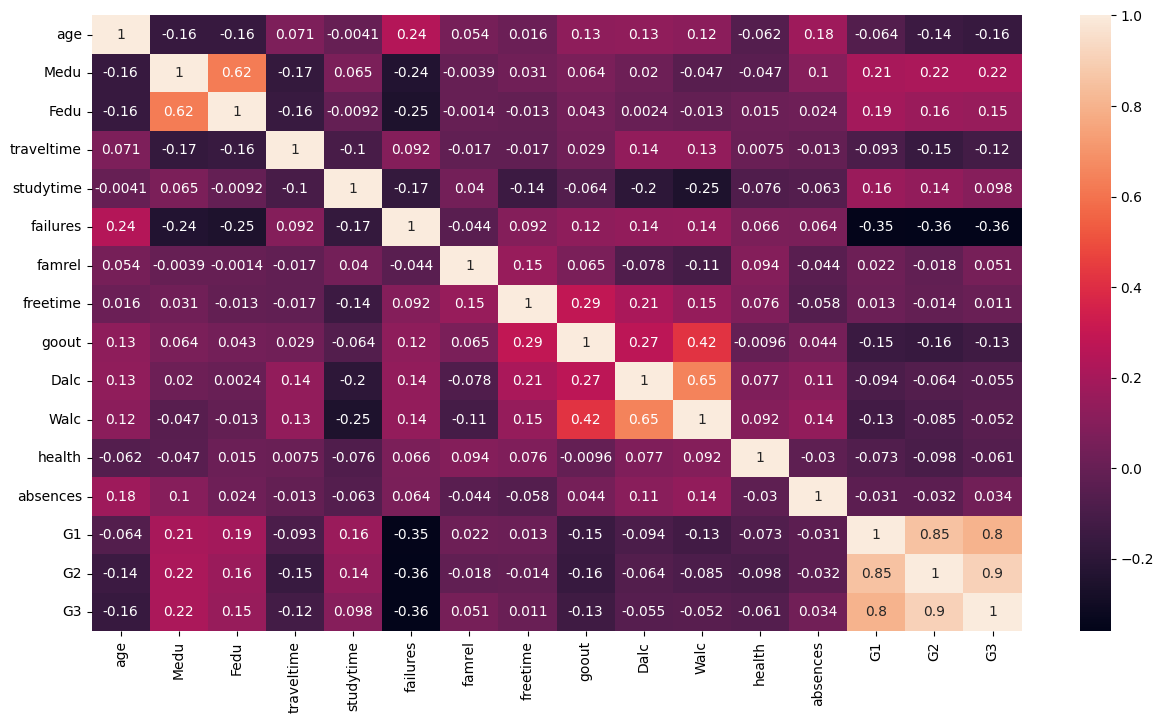

In [26]:
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(data=dfm.corr(method='pearson'),annot=True )
print('correlação dfm method= pearson')

correlação dfp method= pearson


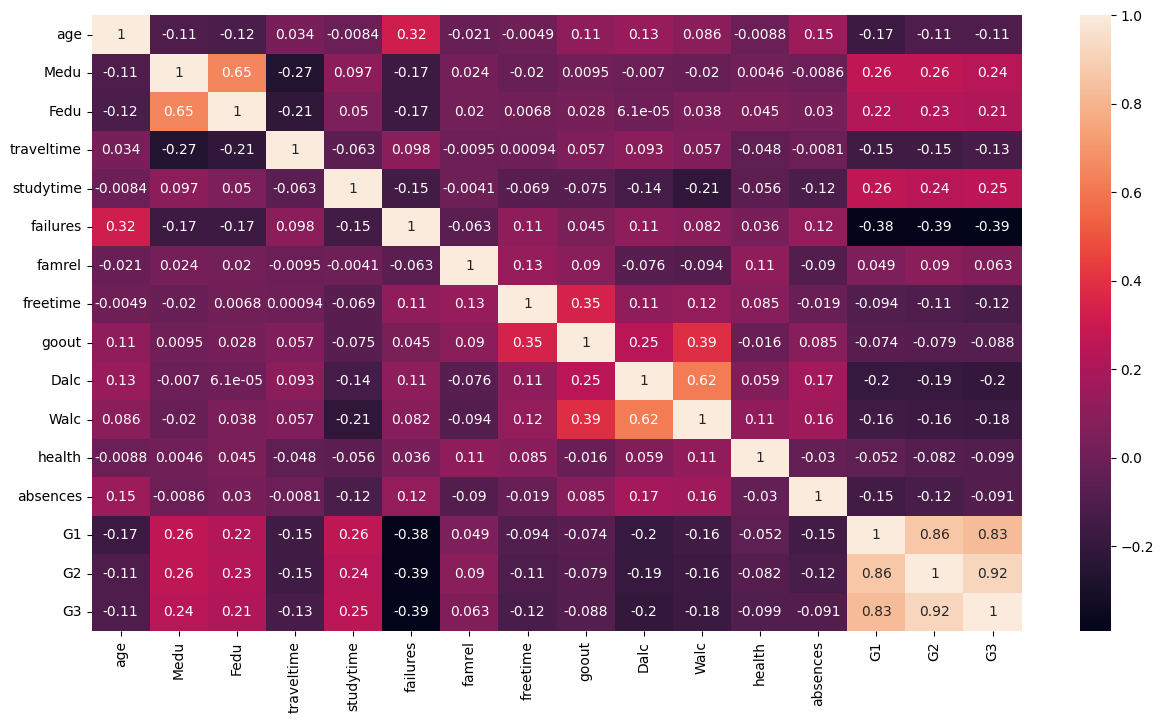

In [27]:
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(data=dfp.corr(method='pearson'),annot=True )
print('correlação dfp method= pearson')

<AxesSubplot: xlabel='age', ylabel='Dalc'>

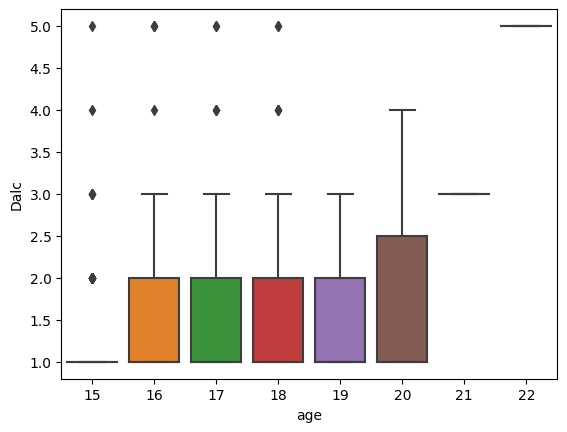

In [32]:
sns.boxplot(dfm, x=dfm['age'], y=dfm['Dalc'])

<AxesSubplot: xlabel='age', ylabel='Dalc'>

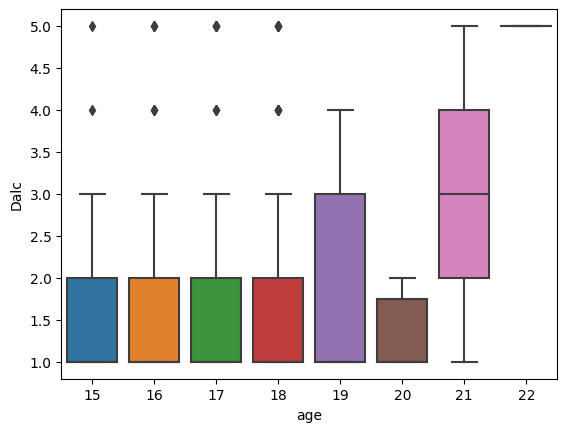

In [33]:
sns.boxplot(dfp, x=dfp['age'], y=dfp['Dalc'])

<AxesSubplot: xlabel='age', ylabel='Walc'>

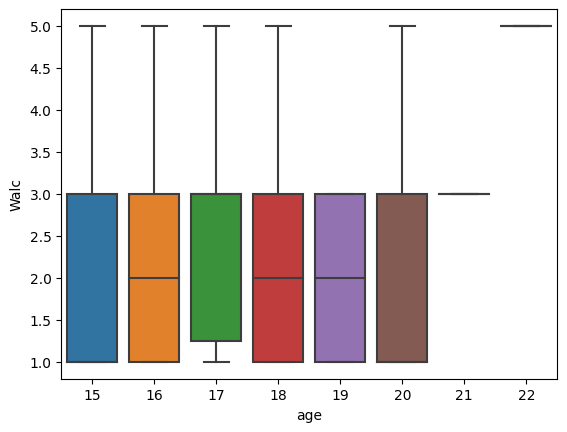

In [34]:
sns.boxplot(dfm, x=dfm['age'], y=dfm['Walc'])

<AxesSubplot: xlabel='age', ylabel='Walc'>

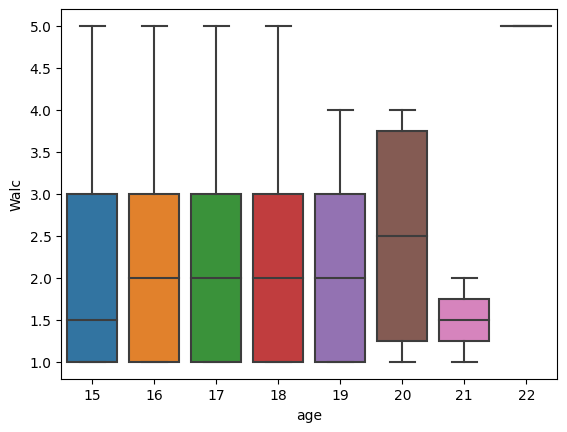

In [41]:
sns.boxplot(dfp, x=dfp['age'], y=dfp['Walc'])

In [45]:
dfm_age = dfm.groupby(by="age").mean()    

In [46]:
dfm_age

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,,,,,,,,,,,,,,,
15,3.036585,2.756098,1.365854,2.158537,0.268293,4.000000,3.280488,2.743902,1.353659,1.902439,3.585366,3.341463,11.231707,11.365854,11.256098
16,2.826923,2.576923,1.403846,1.875000,0.230769,3.836538,3.230769,3.173077,1.432692,2.278846,3.701923,5.451923,10.942308,11.182692,11.028846
17,2.612245,2.469388,1.459184,2.020408,0.244898,3.908163,3.224490,3.204082,1.520408,2.571429,3.500000,6.459184,10.897959,10.479592,10.275510
18,2.707317,2.475610,1.585366,2.146341,0.292683,4.024390,3.121951,3.304878,1.548780,2.414634,3.439024,6.048780,10.719512,10.134146,9.548780
19,2.166667,2.041667,1.458333,2.083333,1.166667,3.875000,3.250000,2.916667,1.458333,1.958333,3.500000,10.458333,10.250000,9.250000,8.208333
20,3.000000,2.000000,1.333333,2.000000,1.333333,5.000000,4.666667,3.333333,2.000000,2.333333,4.000000,5.000000,13.666667,13.666667,14.000000
21,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,10.000000,8.000000,7.000000
22,3.000000,1.000000,1.000000,1.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,16.000000,6.000000,8.000000,8.000000
